In [ ]:
import pandas as pd
from pathlib import Path

# ------------------------------------------------------------------
# 1) Where are your CSV files?
#    "."  → current working directory of the notebook kernel
# ------------------------------------------------------------------
folder = Path("./results_tmp")          # change if needed

# ------------------------------------------------------------------
# 2) Find and read all *.csv (non-recursive)
# ------------------------------------------------------------------
csv_files = sorted(folder.glob("*.csv"))
if not csv_files:
    raise FileNotFoundError(f"No .csv files found in {folder.resolve()}")

frames = []
for f in csv_files:
    try:
        df = pd.read_csv(f)
        df["source_file"] = f.name          # keep origin column (optional)
        frames.append(df)
    except Exception as e:
        print(f"⚠️  Skipped {f.name}: {e}")

# ------------------------------------------------------------------
# 3) Concatenate into one DataFrame
# ------------------------------------------------------------------
combined = pd.concat(frames, ignore_index=True)
print(f"{len(csv_files)} files   →   {len(combined)} total rows →   {len(combined)*11} training runs")

# Show a quick peek
combined.head()


In [2]:
#combined.to_csv("combined_with_duplicates.csv", index=False)
combined = pd.read_csv("combined.csv")
print(len(combined)*11)

976866


In [3]:
combined = pd.read_csv("combined.csv")

# Replace EHIMP / EHIMP_x patterns (and EMHIMP variants)
combined["repr_model"] = combined["repr_model"].str.replace(
    r"^EHIMP_([abc])$", lambda m: f"HOIMP ({m.group(1)})", regex=True
).str.replace(r"^EHIMP$", "HOIMP", regex=True).str.replace(
    r"^EMHIMP_([abc])$", lambda m: f"HOIMP ({m.group(1)})", regex=True
).str.replace(r"^EMHIMP$", "HOIMP", regex=True)

# Replace HIMP_b
combined["repr_model"] = combined["repr_model"].str.replace(
    r"^HIMP_b$", "HIMP (b)", regex=True
)

print(len(combined) * 11)


976866


In [4]:
#combined = combined.round(2)
subset = combined#[combined["repr_model"]=='EHIMP']#.round(2) #
#subset = combined[
    #(combined["repr_model"] != 'EHIMP_a') &
    #(combined["repr_model"] == 'EHIMP_c') #&
    #(combined["repr_model"] != 'EHIMP_b')            
#]

#subset["repr_model"] = (
#    subset["repr_model"]
#    .str.replace(r"^EHIMP_[abc]$", "EHIMP", regex=True)
#)

#subset["repr_model"] = (
#    subset["repr_model"]
#    .str.replace(r"^HIMP_[abc]$", "HIMP", regex=True)
#)

#subset["repr_model"] = (
#    subset["repr_model"]
#    .str.replace("GAT", "GNN")
#)

#subset["repr_model"] = (
#    subset["repr_model"]
#    .str.replace("GIN", "GNN")
#)

#subset["repr_model"] = (
#    subset["repr_model"]
#    .str.replace("GCN", "GNN")
#)

#subset["repr_model"] = (
#    subset["repr_model"]
#    .str.replace("GraphSAGE", "GNN")
#)



best_rows = subset.loc[
    subset.groupby("target_task")["mae_test_scaffold"].idxmin()
].sort_values("target_task")#.round(2)

best_rows
#print(best_rows)
#print(best_rows.source_file.values)


,task,target_task,batch_size,dropout,epochs,lr,weight_decay,repr_model,num_layers,encoding_dim,...,scaffold_split_val_sz,use_erg,use_ft,ft_resolution,rg_embedding_dim,mean_val_loss,std_val_loss,mae_test_scaffold,source_file,radius
72530,molecule_net,ESOL,64,0.1,150,0.001,0.0001,GIN,3,8,...,0.1,False,False,1,8,0.496068,0.041204,0.647007,run_galadriel_3247390_ab940137_20250626_125051...,NaN
4222,molecule_net,FreeSolv,64,0.1,100,0.001,0.0001,GAT,1,8,...,0.1,False,False,1,8,0.881914,0.120186,1.345317,run_dgx-h100-em2_141807_a6d9ac75_20250627_0701...,NaN
74460,admet,HLM,64,0.1,150,0.001,0.0001,HOIMP (c),3,8,...,0.1,True,True,1,16,0.374880,0.043199,0.374185,run_galadriel_3534507_20fa4ba0_20250630_171753...,NaN
15216,admet,KSOL,64,0.1,150,0.001,0.0001,HOIMP,3,8,...,0.1,True,False,1,16,0.343942,0.043961,0.234901,run_dgx-h100-em2_260401_b5dbf9e5_20250715_0033...,NaN
17833,molecule_net,Lipo,64,0.1,100,0.001,0.0001,HOIMP (b),3,8,...,0.1,True,True,2,32,0.493343,0.011359,0.489077,run_dgx-h100-em2_2801946_08171be1_20250703_043...,NaN
20341,admet,LogD,64,0.1,150,0.001,0.0001,HOIMP,1,8,...,0.1,True,False,1,32,0.582142,0.116331,0.587154,run_dgx-h100-em2_294422_266ea7a2_20250715_0046...,NaN
22544,admet,MDR1-MDCKII,64,0.1,150,0.001,0.0001,HOIMP (b),1,8,...,0.1,True,False,1,16,0.309820,0.020469,0.239700,run_dgx-h100-em2_329335_05e2f43a_20250715_0056...,NaN
1348,admet,MLM,64,0.1,100,0.001,0.0001,HOIMP (b),3,8,...,0.1,True,True,1,32,0.442113,0.063184,0.414600,run_dgx-h100-em2_1165140_b8f5a83e_20250630_174...,NaN
8559,potency,pIC50 (MERS-CoV Mpro),64,0.1,50,0.001,0.0001,HIMP,2,8,...,0.1,False,False,1,8,0.487091,0.043204,0.575830,run_dgx-h100-em2_1980163_557d6d7a_20250626_131...,NaN
33285,potency,pIC50 (SARS-CoV-2 Mpro),128,0.1,150,0.001,0.0001,HOIMP (b),3,8,...,0.1,True,False,1,32,0.495830,0.050529,0.300867,run_dgx-h100-em2_417566_45f31deb_20250715_0134...,NaN


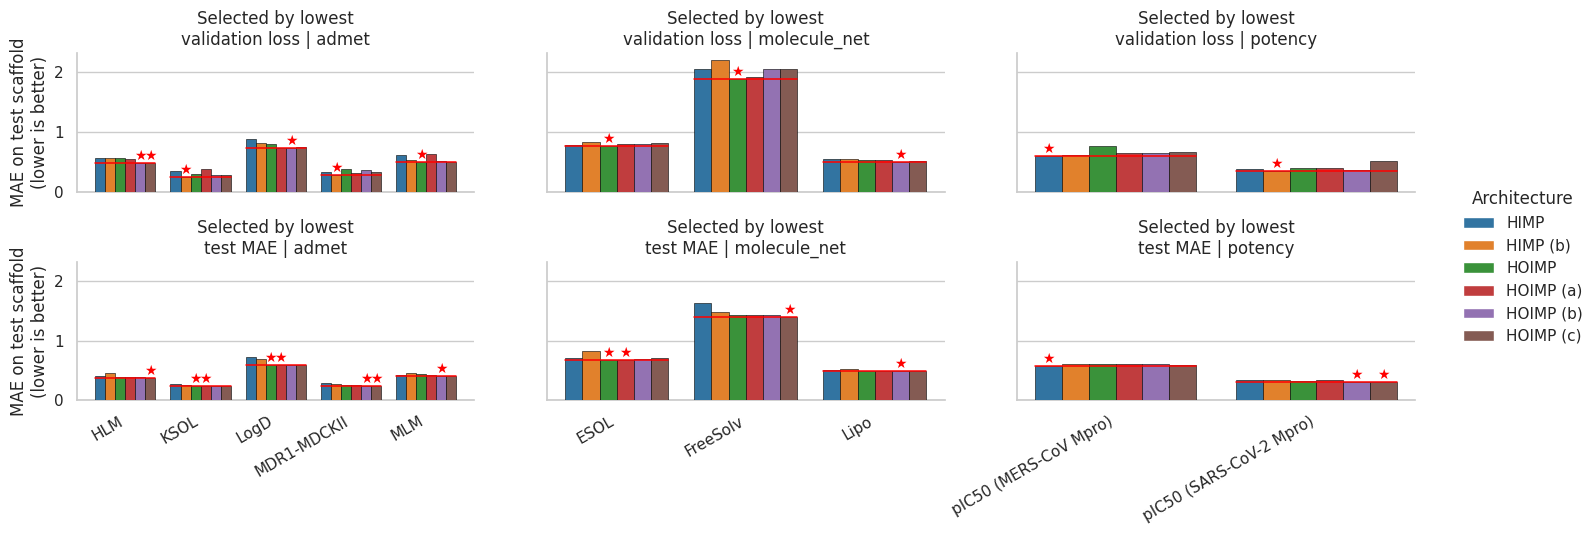

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from copy import deepcopy as dc

subset = dc(combined)
subset = subset[
    (subset["repr_model"] == 'HOIMP (a)') |
    (subset["repr_model"] == 'HOIMP (c)') |
    (subset["repr_model"] == 'HOIMP (b)') |
    (subset["repr_model"] == 'HOIMP') |
    (subset["repr_model"] == 'HIMP (b)') |
    (subset["repr_model"] == 'HIMP')
]

#subset["repr_model"] = (
#    subset["repr_model"]
#    .str.replace(r"^EHIMP_[abc]$", "EHIMP", regex=True)
#)

#subset["repr_model"] = (
#    subset["repr_model"]
#    .str.replace(r"^HIMP_[abc]$", "HIMP", regex=True)
#)


ARCH_COL = "repr_model"

# ── 1. tables for the two selection criteria ─────────────────────────────
by_val = (
    subset.groupby(["task", "target_task", ARCH_COL])["mean_val_loss"]
            .idxmin().round()
)
best_val = subset.loc[by_val].copy()
best_val["criterion"] = "Selected by lowest\nvalidation loss"

by_mae = (
    subset.groupby(["task", "target_task", ARCH_COL])["mae_test_scaffold"]
            .idxmin()
)
best_mae = subset.loc[by_mae].copy()
best_mae["criterion"] = "Selected by lowest\ntest MAE"

plot_data = pd.concat([best_val, best_mae], ignore_index=True)

# consistent palette for architectures
archs   = sorted(plot_data[ARCH_COL].unique())
palette = dict(zip(archs, sns.color_palette(n_colors=len(archs))))

# ── 2. facet grid: row = criterion (2 rows), col = task ──────────────────
sns.set_theme(style="whitegrid")
g = sns.FacetGrid(
    plot_data,
    row="criterion",
    col="task",
    sharex=False,           # so each panel gets only its targets
    height=2.75,
    aspect=1.8,
)

def bars(data, **kwargs):
    order = data["target_task"].unique()
    sns.barplot(
        data=data,
        x="target_task",
        y="mae_test_scaffold",
        hue=ARCH_COL,
        order=order,
        palette=palette,
        dodge=True,
        **kwargs,
    )

g.map_dataframe(bars)

g.set_axis_labels("", "MAE on test scaffold\n(lower is better)")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.add_legend(title="Architecture")

# ── 3. add ★ over lowest bar(s) per (task,target_task) ───────────────────
star_kw = dict(s="★", color="red", fontsize=10,
               ha="center", va="bottom", zorder=6)

for ax in g.axes.flat:
    if not ax.patches:
        continue

    # match each bar to its category tick via nearest tick position
    tick_pos = np.asarray(ax.get_xticks())
    tick_lab = [t.get_text() for t in ax.get_xticklabels()]
    groups   = {lab: [] for lab in tick_lab}

    for p in ax.patches:
        if p.get_height() == 0:           # skip phantom bars
            continue
        cx   = p.get_x() + p.get_width()/2
        idx  = int(np.argmin(np.abs(tick_pos - cx)))
        groups[tick_lab[idx]].append(p)

    for bars in groups.values():
        if not bars:
            continue
        min_h = min(b.get_height() for b in bars)
        for b in bars:
            if np.isclose(b.get_height(), min_h):
                ax.text(b.get_x() + b.get_width()/2, b.get_height(), **star_kw)

        # line
        min_h = min(b.get_height() for b in bars)

        # span from left-most bar edge to right-most bar edge
        x_left  = min(b.get_x() for b in bars)
        x_right = max(b.get_x() + b.get_width() for b in bars)

        # put the line slightly above the bar tops (2 % of axis range)
        y_offset = 0.00 * (ax.get_ylim()[1] - ax.get_ylim()[0])
        y_line   = min_h + y_offset

        ax.plot([x_left, x_right], [y_line, y_line],
                color="red", linewidth=1.1, zorder=6)

# rotate x-tick labels
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=25, ha="right")

# ----------------------------------------------
# 4. show x-labels only on the second row
# ----------------------------------------------
n_cols = len(g.col_names)            # how many panels per row
for i, ax in enumerate(g.axes.flat):
    row_idx = i // n_cols            # 0 = first row, 1 = second row
    if row_idx == 0:
        ax.set_xlabel("")            # remove x-axis label
        ax.set_xticklabels([])       # hide tick labels
    else:
        # keep & rotate labels for the second row
        plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# ────────────────── 5. give every bar a black outline ────────────────────
for ax in g.axes.flat:
    for p in ax.patches:
        p.set_edgecolor("black")   # outline colour
        p.set_linewidth(0.4)       # outline thickness
        p.set_zorder(3)            # ensure outline sits above grid lines

        
# leave room at right for legend
plt.tight_layout(rect=[0, 0, 0.90, 1])
plt.show()


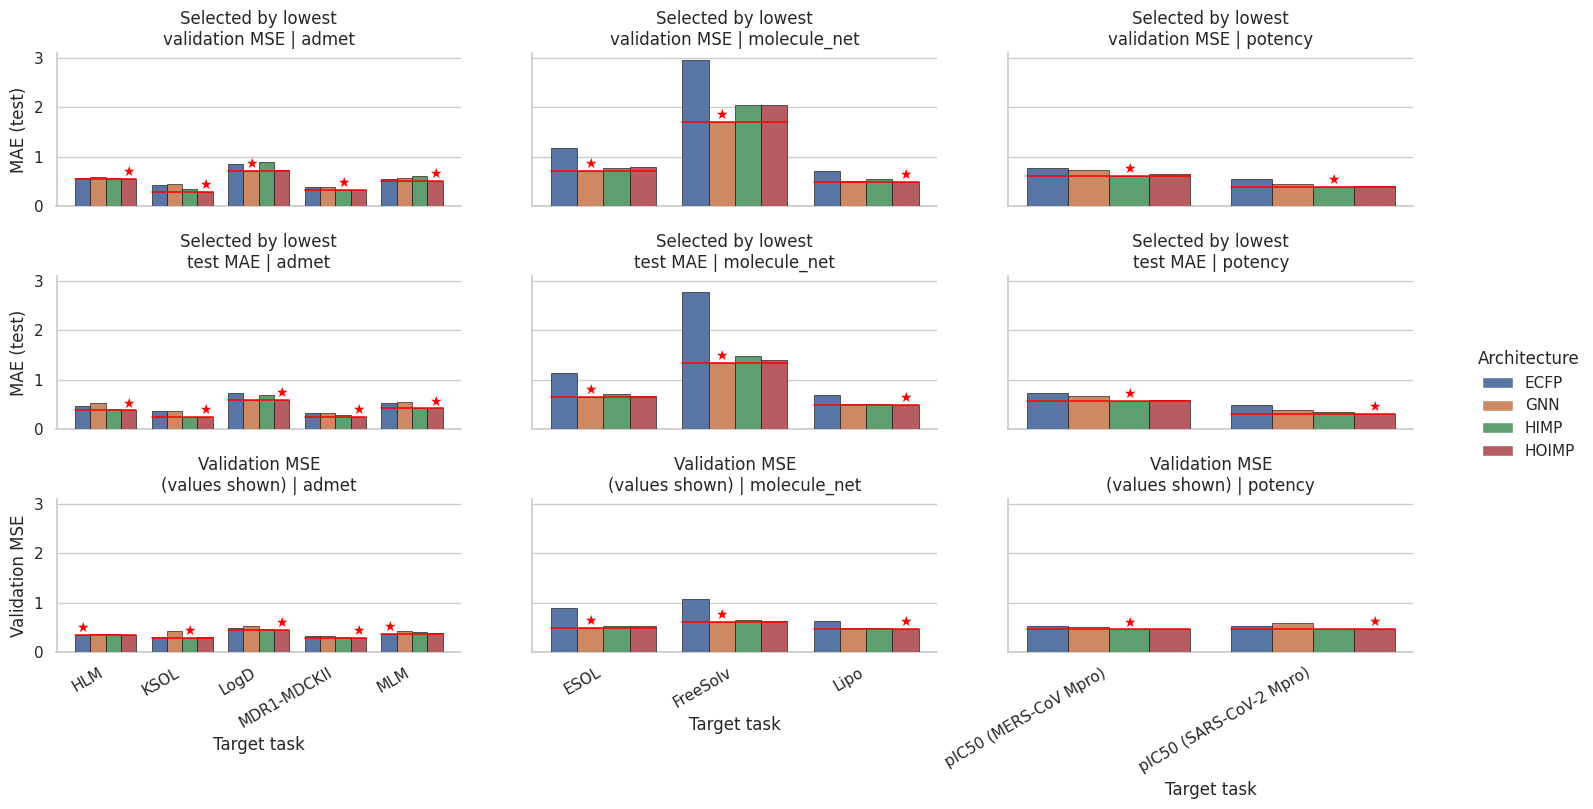

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from copy import deepcopy as dc

subset = dc(combined)
#subset = subset[
#    (subset["repr_model"] == 'EHIMP_a') |
#    (subset["repr_model"] == 'EHIMP_c') |
#    (subset["repr_model"] == 'EHIMP_b') |
#    (subset["repr_model"] == 'EHIMP') |
#    (subset["repr_model"] == 'HIMP_b') |
#    (subset["repr_model"] == 'HIMP')
#]

# Collapse architecture variants to base labels
subset["repr_model"] = subset["repr_model"].str.replace(r"^HOIMP \([abc]\)$", "HOIMP", regex=True)
subset["repr_model"] = subset["repr_model"].str.replace(r"^HIMP \([abc]\)$", "HIMP", regex=True)
subset["repr_model"] = subset["repr_model"].str.replace(r"^HIMP_[abc]$", "HIMP", regex=True)  # in case HIMP_a / HIMP_c remain

# Collapse base GNN architectures
subset["repr_model"] = subset["repr_model"].replace({
    "GAT": "GNN",
    "GIN": "GNN",
    "GCN": "GNN",
    "GraphSAGE": "GNN"
})

ARCH_COL = "repr_model"

# ────────────────── 1. build three “best” tables ─────────────────────────
# row-1: lowest mean_val_loss (eval plotted in MAE)
idx_val = subset.groupby(["task", "target_task", ARCH_COL])["mean_val_loss"].idxmin()
best_val = subset.loc[idx_val].copy()
best_val["criterion"] = "Selected by lowest\nvalidation MSE"

# row-2: lowest test MAE
idx_mae = subset.groupby(["task", "target_task", ARCH_COL])["mae_test_scaffold"].idxmin()
best_mae = subset.loc[idx_mae].copy()
best_mae["criterion"] = "Selected by lowest\ntest MAE"

# row-3: *also* lowest mean_val_loss, but bars show validation MSE
best_val_y = best_val.copy()
best_val_y["criterion"] = "Validation MSE\n(values shown)"

plot_data = pd.concat([best_val, best_mae, best_val_y], ignore_index=True)

# ────────────────── 2. consistent palette for architectures ──────────────
archs   = sorted(plot_data[ARCH_COL].unique())
palette = dict(zip(archs, sns.color_palette(n_colors=len(archs))))

# ────────────────── 3. facet grid (3 rows) ───────────────────────────────
sns.set_theme(style="whitegrid")
g = sns.FacetGrid(
    plot_data,
    row="criterion",
    col="task",
    sharex=False,
    height=2.75,
    aspect=1.8,
)

def bars(data, **kwargs):
    order = data["target_task"].unique()
    # choose y-axis: row-3 shows validation loss, others show test MAE
    y_col = "mean_val_loss" if "Validation MSE" in data["criterion"].iloc[0] else "mae_test_scaffold"
    sns.barplot(
        data=data,
        x="target_task", y=y_col,
        hue=ARCH_COL, order=order,
        palette=palette, dodge=True, **kwargs)

g.map_dataframe(bars)

# y-axis label depends on row; set none here and add later
g.set_axis_labels("", "")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.add_legend(title="Architecture")

# ────────────────── 4. stars/lines on the lowest bar per category ────────
star_kw = dict(s="★", color="red", fontsize=10,
               ha="center", va="bottom", zorder=6)

for ax, crit in zip(g.axes.flat, plot_data["criterion"].unique().repeat(len(g.col_names))):
    # determine which value was plotted on this row
    y_attr = "mean_val_loss" if "Validation MSE" in crit else "mae_test_scaffold"
    patches = [p for p in ax.patches if p.get_height() > 0]  # ignore phantom bars
    if not patches:
        continue
    # map bars to categories by nearest tick
    tick_x = np.asarray(ax.get_xticks())
    tick_lb = [lab.get_text() for lab in ax.get_xticklabels()]
    groups = {lb: [] for lb in tick_lb}
    for p in patches:
        cx = p.get_x() + p.get_width()/2
        idx = int(np.argmin(np.abs(tick_x - cx)))
        groups[tick_lb[idx]].append(p)
    # star + line
    for ps in groups.values():
        min_h = min(p.get_height() for p in ps)
        for p in ps:
            if np.isclose(p.get_height(), min_h):
                ax.text(p.get_x()+p.get_width()/2, p.get_height(), **star_kw)
        x_l = min(p.get_x() for p in ps)
        x_r = max(p.get_x()+p.get_width() for p in ps)
        ax.plot([x_l, x_r], [min_h, min_h], color="red", linewidth=1.1, zorder=6)

# ────────────────── 5. aesthetics: labels, outlines, rotations ───────────
for ax in g.axes.flatten():
    for p in ax.patches:
        p.set_edgecolor("black")
        p.set_linewidth(0.4)
        p.set_zorder(3)

# show x-labels only on the bottom row (row index 2)
n_cols = len(g.col_names)
for i, ax in enumerate(g.axes.flat):
    row = i // n_cols
    if row < 2:
        ax.set_xlabel("")
        ax.set_xticklabels([])
    else:
        ax.set_xlabel("Target task")
        plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# add y-axis label text manually for each row
for row_idx, ylabel in enumerate(["MAE (test)", "MAE (test)", "Validation MSE"]):
    g.axes[row_idx, 0].set_ylabel(ylabel)    # row-major indexing

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

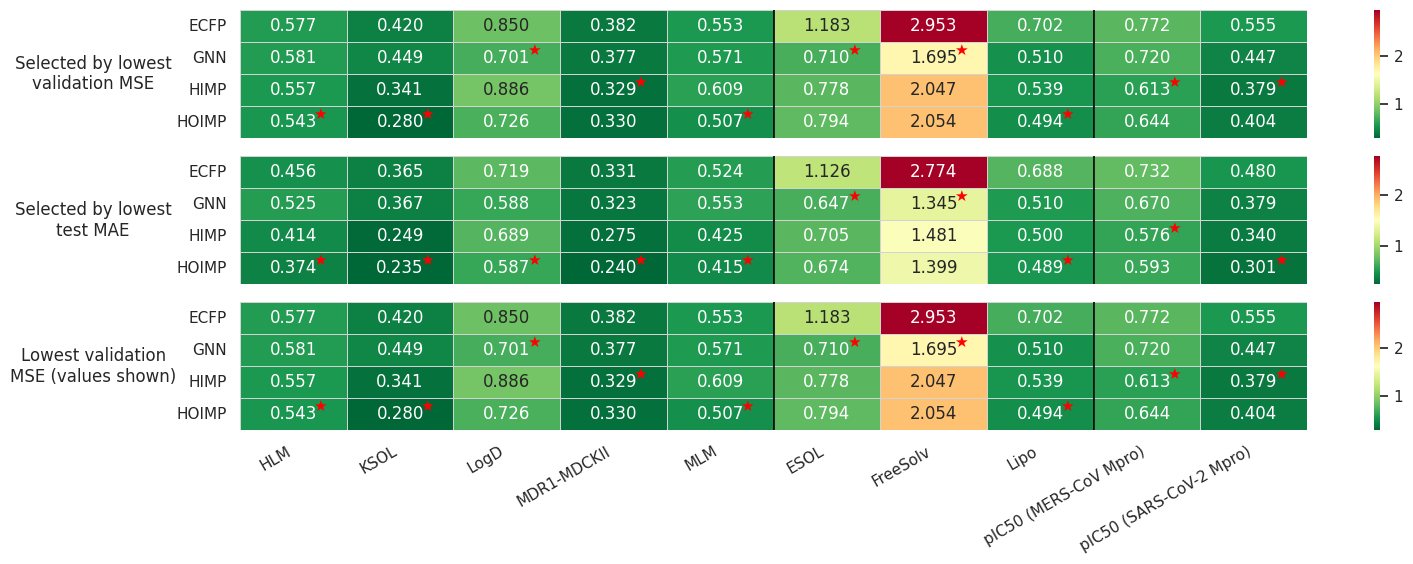

In [7]:
import seaborn as sns, matplotlib.pyplot as plt
import numpy as np, pandas as pd
from copy import deepcopy as dc

subset = dc(combined)
#subset = subset[
#    (subset["repr_model"] == 'EHIMP_a') |
#    (subset["repr_model"] == 'EHIMP_c') |
#    (subset["repr_model"] == 'EHIMP_b') |
#    (subset["repr_model"] == 'EHIMP') |
#    (subset["repr_model"] == 'HIMP_b') |
#    (subset["repr_model"] == 'HIMP')
#]

# Collapse architecture variants to base labels
subset["repr_model"] = subset["repr_model"].str.replace(r"^HOIMP \([abc]\)$", "HOIMP", regex=True)
subset["repr_model"] = subset["repr_model"].str.replace(r"^HIMP \([abc]\)$", "HIMP", regex=True)
subset["repr_model"] = subset["repr_model"].str.replace(r"^HIMP_[abc]$", "HIMP", regex=True)  # in case HIMP_a / HIMP_c remain

# Collapse base GNN architectures
subset["repr_model"] = subset["repr_model"].replace({
    "GAT": "GNN",
    "GIN": "GNN",
    "GCN": "GNN",
    "GraphSAGE": "GNN"
})

ARCH_COL = "repr_model"

# ---- build three tables (same as before) ---------------------------------
idx_val = subset.groupby(["task", "target_task", ARCH_COL])["mean_val_loss"].idxmin()
best_val = subset.loc[idx_val].copy()
best_val["criterion"] = "Selected by lowest\nvalidation MSE"

idx_mae = subset.groupby(["task", "target_task", ARCH_COL])["mae_test_scaffold"].idxmin()
best_mae = subset.loc[idx_mae].copy()
best_mae["criterion"] = "Selected by lowest\ntest MAE"

best_val_y = best_val.copy()
best_val_y["criterion"] = "Lowest validation\nMSE (values shown)"

plot_data = pd.concat([best_val, best_mae, best_val_y], ignore_index=True)
plot_data["metric"] = np.where(
    plot_data["criterion"].str.contains("Validation MSE"),
    plot_data["mean_val_loss"],
    plot_data["mae_test_scaffold"]
)#.round(2)

crit_order = ["Selected by lowest\nvalidation MSE",
              "Selected by lowest\ntest MAE",
              "Lowest validation\nMSE (values shown)"]

# order target tasks grouped by high‑level task
target_order = (plot_data[["task","target_task"]]
                .drop_duplicates()
                .sort_values(["task","target_task"]))
target_order = list(target_order["target_task"])
arch_order   = sorted(plot_data[ARCH_COL].unique())

sns.set_theme(style="white")

fig, axes = plt.subplots(
    nrows=len(crit_order), ncols=1,
    figsize=(1.2*len(target_order)+4, 1.2*len(arch_order)+1),
    sharex=False, sharey=True
)

if len(crit_order) == 1:
    axes = [axes]

for ax, crit in zip(axes, crit_order):
    sub = plot_data[plot_data["criterion"] == crit]

    # pivot to matrix (arch x target)
    mat = (sub.pivot(index=ARCH_COL, columns="target_task", values="metric")
             .reindex(index=arch_order, columns=target_order))

    # draw heatmap
    hm = sns.heatmap(
        mat, ax=ax, cmap="RdYlGn_r",
        annot=True, fmt=".3f",
        cbar=True, linewidths=.5, linecolor="lightgrey",
        vmin=mat.min().min(), vmax=mat.max().max()
    )

    # mark minima per column
    for j, col in enumerate(mat.columns):
        col_vals = mat[col]
        if col_vals.isna().all(): 
            continue
        min_mask = (col_vals == col_vals.min())
        for i_idx in np.where(min_mask)[0]:
            ax.text(j+0.75, i_idx+0.25, "★",
                    ha="center", va="center",
                    color="red", fontsize=11, zorder=5)

    ax.set_ylabel(crit, rotation=0, labelpad=60, va="center")
    #ax.set_xlabel("Target task")
    ax.set_xlabel("")

    # vertical separators between tasks
    task_series = (plot_data[["target_task","task"]]
                   .drop_duplicates()
                   .set_index("target_task")["task"]
                   .reindex(mat.columns))
    # when task changes between adjacent columns, draw a line
    for idx in range(1, len(mat.columns)):
        if task_series.iloc[idx] != task_series.iloc[idx-1]:
            ax.axvline(idx, color="black", linewidth=1.2)

    # nicer tick labels
    if crit != crit_order[-1]:
        ax.set_xticklabels([], rotation=30, ha="right")
    else:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()


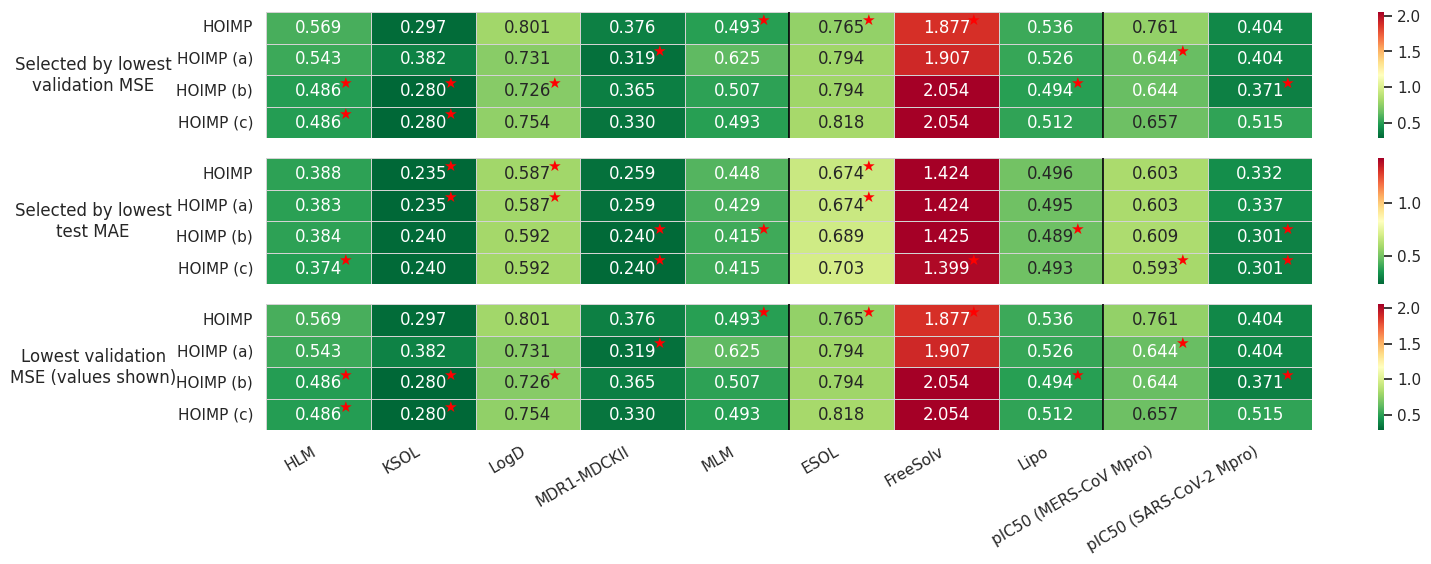

In [8]:
import seaborn as sns, matplotlib.pyplot as plt
import numpy as np, pandas as pd
from copy import deepcopy as dc

subset = dc(combined)
subset = subset[
    (subset["repr_model"] == 'HOIMP (a)') |
    (subset["repr_model"] == 'HOIMP (b)') |
    (subset["repr_model"] == 'HOIMP (c)') |
    (subset["repr_model"] == 'HOIMP') #|
#    (subset["repr_model"] == 'HIMP_b') |
#    (subset["repr_model"] == 'HIMP')
]

#subset["repr_model"] = (
#    subset["repr_model"]
#    .str.replace(r"^EHIMP_[abc]$", "EHIMP", regex=True)
#)

#subset["repr_model"] = (
#    subset["repr_model"]
#    .str.replace(r"^HIMP_[abc]$", "HIMP", regex=True)
#)

#subset["repr_model"] = (
#    subset["repr_model"]
#    .str.replace("GAT", "GNN")
#)

#subset["repr_model"] = (
#    subset["repr_model"]
#    .str.replace("GIN", "GNN")
#)

#subset["repr_model"] = (
#    subset["repr_model"]
#    .str.replace("GCN", "GNN")
#)

#subset["repr_model"] = (
#    subset["repr_model"]
#    .str.replace("GraphSAGE", "GNN")
#)

ARCH_COL = "repr_model"

# ---- build three tables (same as before) ---------------------------------
idx_val = subset.groupby(["task", "target_task", ARCH_COL])["mean_val_loss"].idxmin()
best_val = subset.loc[idx_val].copy()
best_val["criterion"] = "Selected by lowest\nvalidation MSE"

idx_mae = subset.groupby(["task", "target_task", ARCH_COL])["mae_test_scaffold"].idxmin()
best_mae = subset.loc[idx_mae].copy()
best_mae["criterion"] = "Selected by lowest\ntest MAE"

best_val_y = best_val.copy()
best_val_y["criterion"] = "Lowest validation\nMSE (values shown)"

plot_data = pd.concat([best_val, best_mae, best_val_y], ignore_index=True)
plot_data["metric"] = np.where(
    plot_data["criterion"].str.contains("Validation MSE"),
    plot_data["mean_val_loss"],
    plot_data["mae_test_scaffold"]
)#.round(2)

crit_order = ["Selected by lowest\nvalidation MSE",
              "Selected by lowest\ntest MAE",
              "Lowest validation\nMSE (values shown)"]

# order target tasks grouped by high‑level task
target_order = (plot_data[["task","target_task"]]
                .drop_duplicates()
                .sort_values(["task","target_task"]))
target_order = list(target_order["target_task"])
arch_order   = sorted(plot_data[ARCH_COL].unique())

sns.set_theme(style="white")

fig, axes = plt.subplots(
    nrows=len(crit_order), ncols=1,
    figsize=(1.2*len(target_order)+4, 1.2*len(arch_order)+1),
    sharex=False, sharey=True
)

if len(crit_order) == 1:
    axes = [axes]

for ax, crit in zip(axes, crit_order):
    sub = plot_data[plot_data["criterion"] == crit]

    # pivot to matrix (arch x target)
    mat = (sub.pivot(index=ARCH_COL, columns="target_task", values="metric")
             .reindex(index=arch_order, columns=target_order))

    # draw heatmap
    hm = sns.heatmap(
        mat, ax=ax, cmap="RdYlGn_r",
        annot=True, fmt=".3f",
        cbar=True, linewidths=.5, linecolor="lightgrey",
        vmin=mat.min().min(), vmax=mat.max().max()
    )

    # mark minima per column
    for j, col in enumerate(mat.columns):
        col_vals = mat[col]
        if col_vals.isna().all(): 
            continue
        min_mask = (col_vals == col_vals.min())
        for i_idx in np.where(min_mask)[0]:
            ax.text(j+0.75, i_idx+0.25, "★",
                    ha="center", va="center",
                    color="red", fontsize=11, zorder=5)

    ax.set_ylabel(crit, rotation=0, labelpad=60, va="center")
    #ax.set_xlabel("Target task")
    ax.set_xlabel("")

    # vertical separators between tasks
    task_series = (plot_data[["target_task","task"]]
                   .drop_duplicates()
                   .set_index("target_task")["task"]
                   .reindex(mat.columns))
    # when task changes between adjacent columns, draw a line
    for idx in range(1, len(mat.columns)):
        if task_series.iloc[idx] != task_series.iloc[idx-1]:
            ax.axvline(idx, color="black", linewidth=1.2)

    # nicer tick labels
    if crit != crit_order[-1]:
        ax.set_xticklabels([], rotation=30, ha="right")
    else:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()


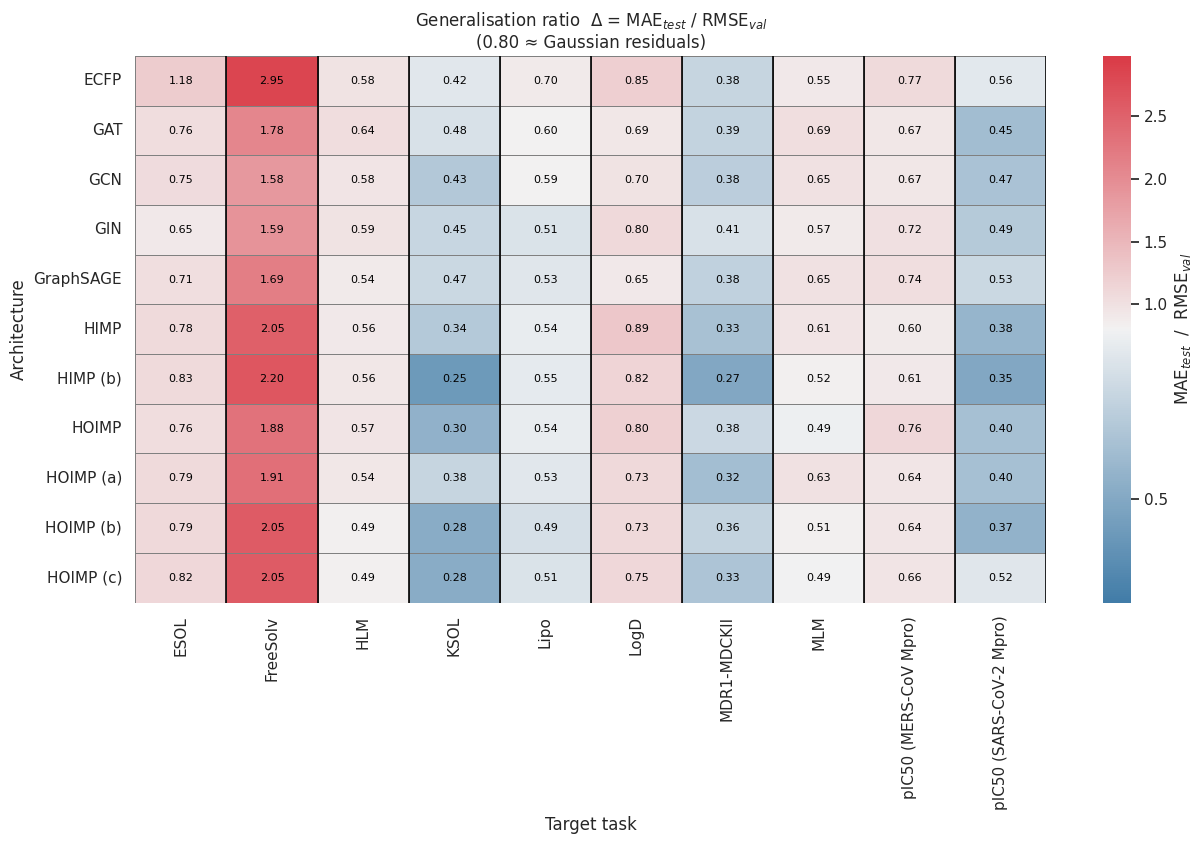

In [9]:
import seaborn as sns, matplotlib.pyplot as plt, pandas as pd, numpy as np

ARCH_COL = "repr_model"

# ── pick one best configuration per (task, target, arch) by lowest val-loss
best_idx = combined.groupby(["task", "target_task", ARCH_COL])["mean_val_loss"].idxmin()
best = combined.loc[best_idx]

# ── compute Δ and pivot to matrix ----------------------------------------
best["gap"] = best["mae_test_scaffold"] / np.sqrt(best["mean_val_loss"])
# If residuals were perfectly Gaussian, in theory MAE/sqrt(MSE) should be 0.798.
# Thus gap = 0.8 -> behaviour consistent with Gaussian noise
# gap > 0.8 -> heavier tails / worse on test than expected
# gap < 0.8 -> lighter tails / surprisingly good on test

heat = (
    best.pivot(index=ARCH_COL, columns="target_task", values="gap")
        .loc[sorted(best[ARCH_COL].unique())]                 # stable row order
)

# also collect the corresponding test-MAE to annotate
mae_mat = (
    best.pivot(index=ARCH_COL, columns="target_task", values="mae_test_scaffold")
        .loc[heat.index, heat.columns]                        # same shape
)

import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ── draw heat-map with gap-aware colour scale ────────────────────────────
fig = plt.figure(figsize=(1.3 * heat.shape[1], 0.6 * heat.shape[0] + 2))

# min/max for colour scale, keep a small buffer around extremes
vmin, vmax = heat.min().min(), heat.max().max()
pad = 0.05 * (vmax - vmin)
norm = mpl.colors.TwoSlopeNorm(vmin=vmin - pad,
                               vcenter=0.80,          # ← Gaussian reference
                               vmax=vmax + pad)

cmap = sns.diverging_palette(240, 10, as_cmap=True)   # blue-white-red

ax = sns.heatmap(
    heat,
    cmap=cmap,
    norm=norm,                    # <-- use the custom norm
    linewidths=.5, linecolor="grey",
    cbar_kws=dict(label="MAE$_{test}$  /  RMSE$_{val}$"),
    annot=mae_mat.round(2), fmt=".2f", annot_kws=dict(size=8, color="black")
)

ax.set_xlabel("Target task")
ax.set_ylabel("Architecture")
ax.set_title("Generalisation ratio  Δ = MAE$_{test}$ / RMSE$_{val}$\n"
             "(0.80 ≈ Gaussian residuals)")

# optional: vertical separators between high-level tasks (kept from your code)
for _, col_idx in (
    best[["target_task", "task"]]
    .drop_duplicates()
    .set_index("target_task")["task"]
    .loc[heat.columns]
    .ne(lambda s: s.shift())
    .cumsum()
    .groupby(lambda x: x).last()
    .items()
):
    ax.axvline(col_idx, color="black", linewidth=1.2)

plt.tight_layout()
plt.show()



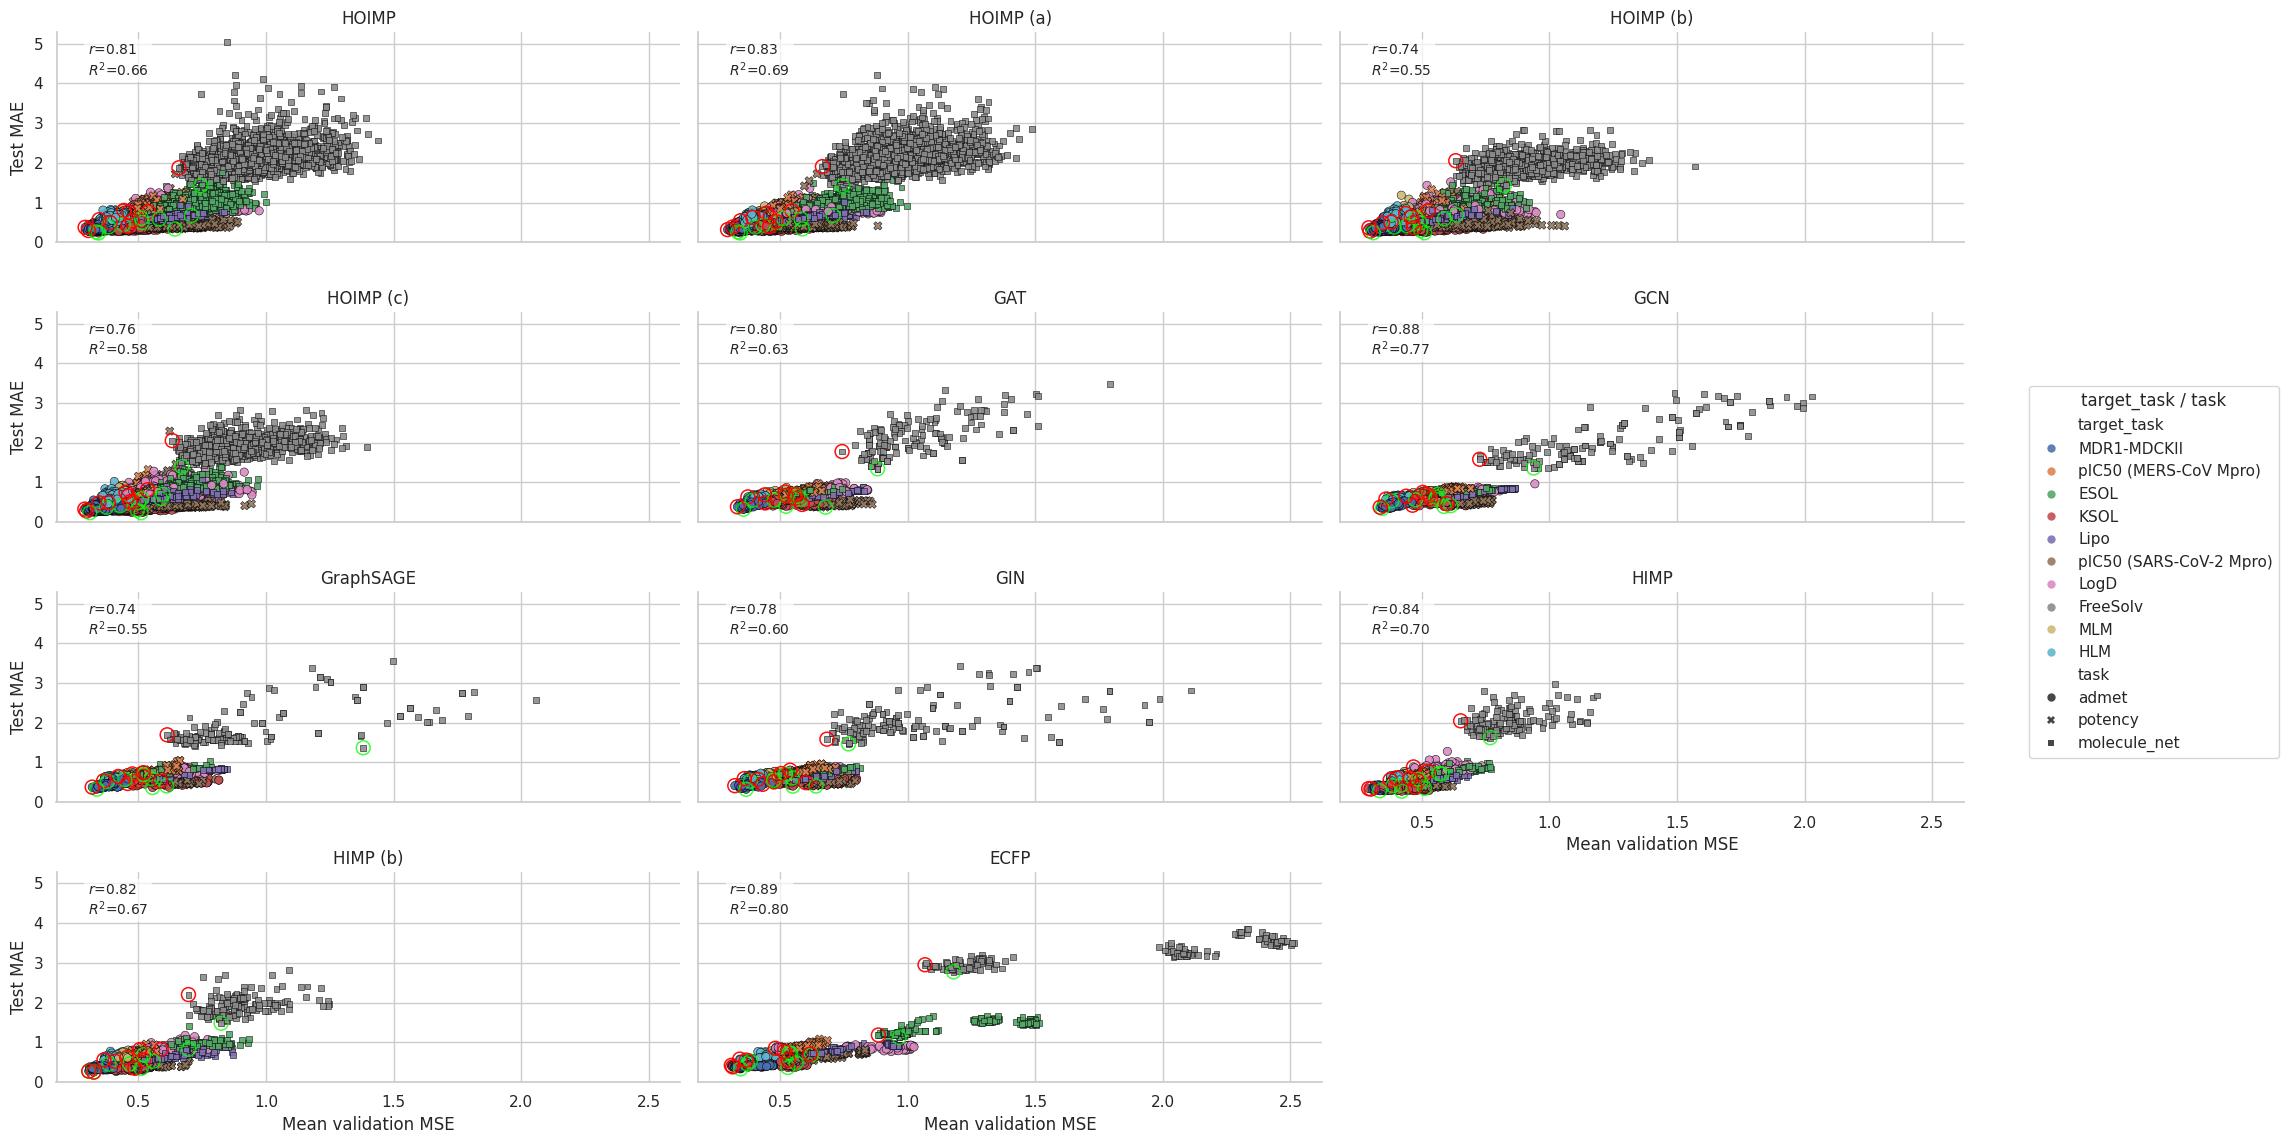


Correlation per architecture (all target_tasks pooled):
architecture  Pearson_r    R2     n
        ECFP      0.894 0.799  1440
         GCN      0.878 0.771  1440
        HIMP      0.838 0.703  1440
   HOIMP (a)      0.831 0.690 20160
    HIMP (b)      0.818 0.669  1433
       HOIMP      0.811 0.658 20160
         GAT      0.796 0.633  1440
         GIN      0.776 0.603  1440
   HOIMP (c)      0.762 0.581 19205
   GraphSAGE      0.741 0.549  1440
   HOIMP (b)      0.739 0.546 19208

Correlation per (target_task, architecture):
            target_task architecture  Pearson_r    R2    n
                   ESOL         ECFP      0.812 0.660  144
                   ESOL          GIN      0.675 0.455  144
                   ESOL    GraphSAGE      0.634 0.403  144
                   ESOL          GCN      0.540 0.291  144
                   ESOL    HOIMP (a)      0.434 0.188 2016
                   ESOL        HOIMP      0.410 0.168 2016
                   ESOL         HIMP      0.409 0.16

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

sns.set_theme(style="whitegrid")

# ────────────────── scatter grid  ──────────────────────────────
g = sns.relplot(
    data=combined,
    x="mean_val_loss",
    y="mae_test_scaffold",
    hue="target_task",
    style="task",
    col="repr_model",
    kind="scatter",
    col_wrap=3,
    height=2.9,
    aspect=2.0,
    alpha=0.9,
)

g.set_axis_labels("Mean validation MSE", #loss
                  "Test MAE")
g.set_titles("{col_name}")

# consolidated legend
g._legend.remove()
handles, labels = g.axes[0].get_legend_handles_labels()
g.fig.legend(handles, labels, title="target_task / task",
             bbox_to_anchor=(1.02, 0.5), loc="center left")

# ----------------------------------------------------------------
# Find which marker Seaborn assigned to each task
# ----------------------------------------------------------------
# the legend handles contain that mapping
marker_lookup = {}   # task → matplotlib MarkerStyle
for handle, label in zip(handles, labels):
    if label in combined["task"].unique():
        marker_lookup[label] = handle.get_marker()

# fall back if some task didn't appear in legend
default_markers = ["o", "s", "D", "^", "v", "P", "X"]
for task, m in zip(sorted(combined["task"].unique()), default_markers):
    marker_lookup.setdefault(task, m)

# colour palette lookup (same hues Seaborn used)
hue_palette = dict(zip(
    combined["target_task"].unique(),
    sns.color_palette()[: combined["target_task"].nunique()]
))

rows = [] 
# ----------------------------------------------------------------
# loop through panels, annotate emphasis points
# ----------------------------------------------------------------
for ax in g.axes.flat:
    arch = ax.get_title()
    subset_arch = combined[combined["repr_model"] == arch]

    # add correlation annotation as before
    if len(subset_arch) >= 2:
        x = subset_arch["mean_val_loss"].values.reshape(-1, 1)
        y = subset_arch["mae_test_scaffold"].values
        r, _ = stats.pearsonr(x.ravel(), y)
        r2 = r2_score(y, LinearRegression().fit(x, y).predict(x))

        rows.append(
            {"architecture": arch, "Pearson_r": r, "R2": r2, "n": len(subset_arch)}
        )
        
        ax.text(0.05, 0.95, f"$r$={r:.2f}\n$R^2$={r2:.2f}",
                transform=ax.transAxes, ha="left", va="top",
                fontsize=10, bbox=dict(boxstyle="round,pad=0.2",
                fc="white", alpha=0.7))

    # highlight points per target_task
    for tgt, grp in subset_arch.groupby("target_task"):
        # lowest test MAE
        mae_row = grp.loc[grp["mae_test_scaffold"].idxmin()]
        ax.scatter(mae_row["mean_val_loss"], mae_row["mae_test_scaffold"],
                   marker="o",#marker_lookup[mae_row["task"]],
                   s=100, facecolors='none',
                   #color=hue_palette[tgt], 
                   edgecolors="lime", alpha=0.75,
                   linewidth=1.1, zorder=5, label='Min Mean test MAE')

        # lowest validation loss
        val_row = grp.loc[grp["mean_val_loss"].idxmin()]
        ax.scatter(val_row["mean_val_loss"], val_row["mae_test_scaffold"],
                   marker="o",#marker_lookup[val_row["task"]],
                   s=100, facecolors='none', edgecolors="red", alpha=0.95,#hue_palette[tgt],
                   linewidth=1.1, zorder=5, label='Min Mean val. MSE')

# ▶ 5. add thin black edge around every normal point (skip hollow highlights)
for ax in g.axes.flat:
    for col in ax.collections:
        # Hollow highlight circles have no facecolour (alpha=0)
        fc = col.get_facecolors()
        if fc.size == 0 or np.all(fc[:, -1] == 0):   # alpha==0 → skip
            continue
        col.set_edgecolor("black")
        col.set_linewidth(0.4)
        col.set_zorder(3)          # draw outline above gridlines


plt.tight_layout()
plt.show()



# ────────────────── summary table  ─────────────────────────────
summary = pd.DataFrame(rows).sort_values("Pearson_r", ascending=False)
print("\nCorrelation per architecture (all target_tasks pooled):")
print(summary.to_string(index=False, float_format="%.3f"))

# ────────────────── summary table per target_task  ─────────────
rows_tgt = []

for (arch, tgt), grp in combined.groupby(["repr_model", "target_task"]):
    if len(grp) < 2:
        continue                                 # need ≥2 points
    x = grp["mean_val_loss"].values
    y = grp["mae_test_scaffold"].values

    r,  _ = stats.pearsonr(x, y)
    model = LinearRegression().fit(x.reshape(-1, 1), y)
    r2 = r2_score(y, model.predict(x.reshape(-1, 1)))

    rows_tgt.append(
        {"target_task": tgt, "architecture": arch, "Pearson_r": r, "R2": r2, "n": len(grp)}
    )

summary_tgt = (
    pd.DataFrame(rows_tgt)
      .sort_values(["target_task", "Pearson_r"], ascending=[True, False])
)

print("\nCorrelation per (target_task, architecture):")
print(summary_tgt.to_string(index=False, float_format="%.3f"))



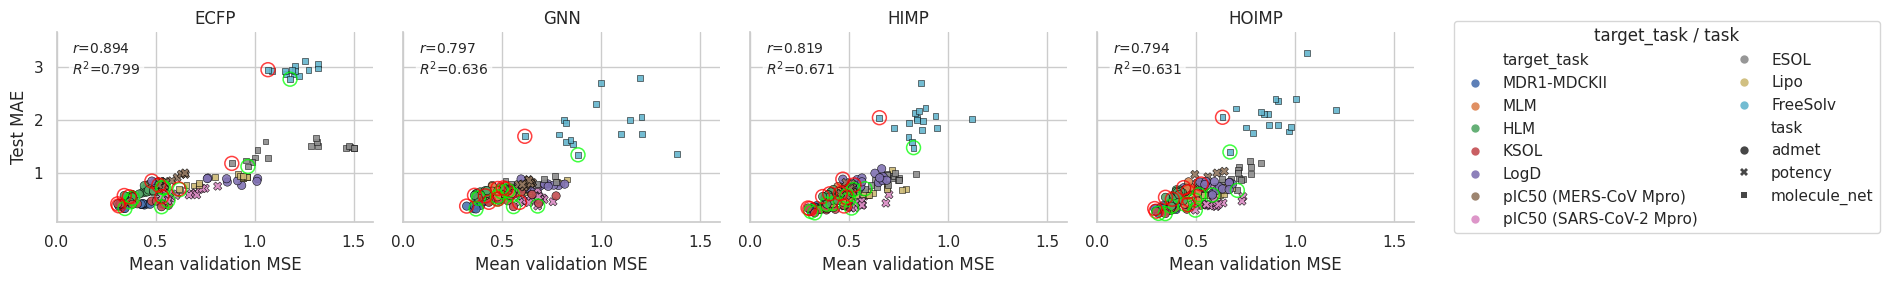


Correlation per architecture (all target_tasks pooled):
architecture  Pearson_r    R2     n
        ECFP      0.894 0.799  1440
        HIMP      0.819 0.671  2873
         GNN      0.797 0.636  5760
       HOIMP      0.794 0.631 78733

Correlation per (target_task, architecture):
            target_task architecture  Pearson_r    R2    n
                   ESOL         ECFP      0.812 0.660  144
                   ESOL         HIMP      0.628 0.394  288
                   ESOL          GNN      0.557 0.310  576
                   ESOL        HOIMP      0.404 0.163 8064
               FreeSolv         ECFP      0.899 0.808  144
               FreeSolv          GNN      0.626 0.392  576
               FreeSolv        HOIMP      0.423 0.179 6157
               FreeSolv         HIMP      0.299 0.090  288
                    HLM         ECFP      0.802 0.643  144
                    HLM          GNN      0.507 0.257  576
                    HLM        HOIMP      0.278 0.077 8064
         

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# ---------- Data prep ----------
subset = combined.copy()

subset["repr_model"] = subset["repr_model"].str.replace(r"^HOIMP \([abc]\)$", "HOIMP", regex=True)
subset["repr_model"] = subset["repr_model"].str.replace(r"^HIMP \([abc]\)$", "HIMP", regex=True)
# Collapse base GNN architectures to a single label
subset["repr_model"] = subset["repr_model"].replace(
    {"GAT": "GNN", "GIN": "GNN", "GCN": "GNN", "GraphSAGE": "GNN"}
)

sns.set_theme(style="whitegrid")

MAX_PER_PANEL = 150
RANDOM_STATE = 42

# ---------- Stratified sampling (keep highlights) ----------
sampled_parts = []
for arch, subset_arch in subset.groupby("repr_model"):
    targets = list(subset_arch["target_task"].unique())
    n_targets = len(targets)
    if n_targets == 0:
        continue

    base = MAX_PER_PANEL // n_targets
    extra = MAX_PER_PANEL - base * n_targets

    sampled_rows = []
    for i, (tgt, grp) in enumerate(subset_arch.groupby("target_task", sort=False)):
        mae_idx = grp["mae_test_scaffold"].idxmin()
        val_idx = grp["mean_val_loss"].idxmin()
        highlight = grp.loc[[mae_idx, val_idx]].copy()

        quota = base + (1 if i < extra else 0)
        remaining = grp.drop(index=highlight.index, errors="ignore")

        if quota > 0 and not remaining.empty:
            take = min(quota, len(remaining))
            rnd = remaining.sample(n=take, random_state=RANDOM_STATE, replace=False)
            sampled_rows.append(rnd)

        sampled_rows.append(highlight)

    panel_df = pd.concat(sampled_rows, ignore_index=True).drop_duplicates()
    sampled_parts.append(panel_df)

sampled = pd.concat(sampled_parts, ignore_index=True)

# ---------- Scatter grid (one row) ----------
n_arch = sampled["repr_model"].nunique()

g = sns.relplot(
    data=sampled,
    x="mean_val_loss",
    y="mae_test_scaffold",
    hue="target_task",
    style="task",
    col="repr_model",      # single row
    kind="scatter",
    height=3.0,
    aspect=1.2,
    alpha=0.9,
)

g.fig.set_size_inches(1.2 * n_arch * 3, 3.0)

g.set_axis_labels("Mean validation MSE", "Test MAE")
g.set_titles("{col_name}")

# Consolidated legend
if g._legend is not None:
    g._legend.remove()
first_ax = g.axes.flat[0]
handles, labels = first_ax.get_legend_handles_labels()
g.fig.legend(handles, labels, title="target_task / task",
             bbox_to_anchor=(1.01, 0.55), loc="center left", ncol=2)

rows = []

# ---------- Correlation + highlight circles ----------
for ax in g.axes.flat:
    arch = ax.get_title()
    full_arch = subset[subset["repr_model"] == arch]

    if len(full_arch) >= 2:
        x = full_arch["mean_val_loss"].values.reshape(-1, 1)
        y = full_arch["mae_test_scaffold"].values
        r, _ = stats.pearsonr(x.ravel(), y)
        r2 = r2_score(y, LinearRegression().fit(x, y).predict(x))
        rows.append({"architecture": arch, "Pearson_r": r, "R2": r2, "n": len(full_arch)})
        ax.text(0.05, 0.95, f"$r$={r:.3f}\n$R^2$={r2:.3f}",
                transform=ax.transAxes, ha="left", va="top",
                fontsize=10,
                bbox=dict(boxstyle="round,pad=0.2", fc="white", alpha=0.7))

    for tgt, grp in full_arch.groupby("target_task"):
        mae_row = grp.loc[grp["mae_test_scaffold"].idxmin()]
        ax.scatter(mae_row["mean_val_loss"], mae_row["mae_test_scaffold"],
                   s=100, facecolors="none", edgecolors="lime",
                   linewidth=1.1, zorder=5, alpha=0.75)

        val_row = grp.loc[grp["mean_val_loss"].idxmin()]
        ax.scatter(val_row["mean_val_loss"], val_row["mae_test_scaffold"],
                   s=100, facecolors="none", edgecolors="red",
                   linewidth=1.1, zorder=5, alpha=0.75)

# Thin black edges for normal sampled points
for ax in g.axes.flat:
    for col in ax.collections:
        fc = col.get_facecolors()
        if fc.size == 0 or np.all(fc[:, -1] == 0):
            continue
        col.set_edgecolor("black")
        col.set_linewidth(0.4)
        col.set_zorder(3)
    ax.set_xlim(0, 1.6)
plt.tight_layout()
plt.show()
g.savefig("results_ablation_selection.pdf", bbox_inches="tight")

# ---------- Summary tables ----------
summary = pd.DataFrame(rows).sort_values("Pearson_r", ascending=False)
print("\nCorrelation per architecture (all target_tasks pooled):")
print(summary.to_string(index=False, float_format="%.3f"))

rows_tgt = []
for (arch, tgt), grp in subset.groupby(["repr_model", "target_task"]):
    if len(grp) < 2:
        continue
    x = grp["mean_val_loss"].values
    y = grp["mae_test_scaffold"].values
    r, _ = stats.pearsonr(x, y)
    model = LinearRegression().fit(x.reshape(-1, 1), y)
    r2 = r2_score(y, model.predict(x.reshape(-1, 1)))
    rows_tgt.append({"target_task": tgt, "architecture": arch,
                     "Pearson_r": r, "R2": r2, "n": len(grp)})

summary_tgt = (pd.DataFrame(rows_tgt)
               .sort_values(["target_task", "Pearson_r"], ascending=[True, False]))
print("\nCorrelation per (target_task, architecture):")
print(summary_tgt.to_string(index=False, float_format="%.3f"))


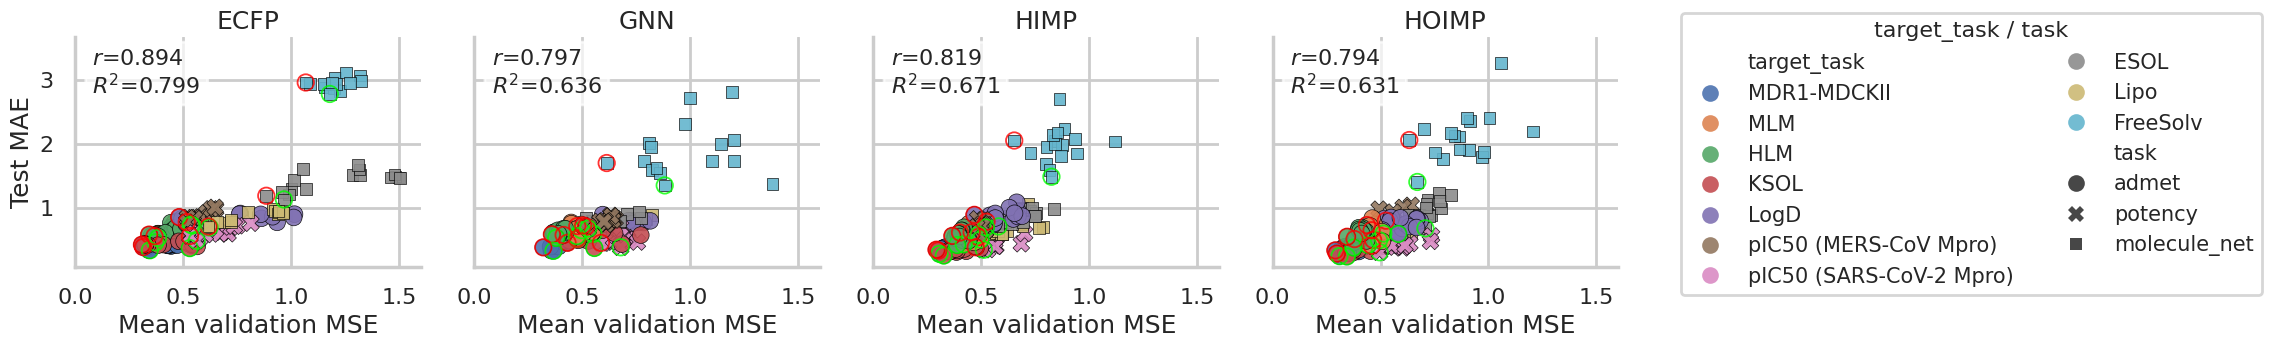

In [12]:
# ---------- Global font scaling ----------
sns.set_theme(style="whitegrid", context="poster")  
# "poster" context gives larger fonts than "talk"

plt.rcParams.update({
    "axes.labelsize": 18,
    "axes.titlesize": 18,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "legend.fontsize": 15,
    "legend.title_fontsize": 16,
})

# ---------- Scatter grid ----------
n_arch = sampled["repr_model"].nunique()
g = sns.relplot(
    data=sampled,
    x="mean_val_loss",
    y="mae_test_scaffold",
    hue="target_task",
    style="task",
    col="repr_model",
    kind="scatter",
    height=4.0,   # taller figure
    aspect=1.25,
    alpha=0.9,
)

g.fig.set_size_inches(1.2 * n_arch * 3.5, 4.0)
g.set_axis_labels("Mean validation MSE", "Test MAE")
g.set_titles("{col_name}", size=18)

# Consolidated legend
if g._legend is not None:
    g._legend.remove()
first_ax = g.axes.flat[0]
handles, labels = first_ax.get_legend_handles_labels()
g.fig.legend(handles, labels, title="target_task / task",
             bbox_to_anchor=(1.01, 0.55), loc="center left", ncol=2)

# ---------- Correlation + highlight ----------
for ax in g.axes.flat:
    arch = ax.get_title()
    full_arch = subset[subset["repr_model"] == arch]

    if len(full_arch) >= 2:
        x = full_arch["mean_val_loss"].values.reshape(-1, 1)
        y = full_arch["mae_test_scaffold"].values
        r, _ = stats.pearsonr(x.ravel(), y)
        r2 = r2_score(y, LinearRegression().fit(x, y).predict(x))
        ax.text(0.05, 0.95, f"$r$={r:.3f}\n$R^2$={r2:.3f}",
                transform=ax.transAxes, ha="left", va="top",
                fontsize=16,   # bigger correlation text
                bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.7))

    for tgt, grp in full_arch.groupby("target_task"):
        mae_row = grp.loc[grp["mae_test_scaffold"].idxmin()]
        ax.scatter(mae_row["mean_val_loss"], mae_row["mae_test_scaffold"],
                   s=140, facecolors="none", edgecolors="lime",
                   linewidth=1.3, zorder=5, alpha=0.8)

        val_row = grp.loc[grp["mean_val_loss"].idxmin()]
        ax.scatter(val_row["mean_val_loss"], val_row["mae_test_scaffold"],
                   s=140, facecolors="none", edgecolors="red",
                   linewidth=1.3, zorder=5, alpha=0.8)

# Tweak normal sampled points outline
for ax in g.axes.flat:
    for col in ax.collections:
        fc = col.get_facecolors()
        if fc.size == 0 or np.all(fc[:, -1] == 0):
            continue
        col.set_edgecolor("black")
        col.set_linewidth(0.5)
        col.set_zorder(3)
    ax.set_xlim(0, 1.6)

plt.tight_layout()
plt.show()
g.savefig("results_ablation_selection.pdf", bbox_inches="tight")


In [13]:
import pandas as pd
import numpy as np

k_values = [5] #1,3,10
ARCH_COL  = "repr_model"
metrics   = ["avg_val_loss", "avg_test_mae", "best_test_mae"]
decimals  = 2                              # ← number of digits to keep
fmt       = f"{{:.{decimals}f}}"          # e.g. "{:.2f}"

for k in k_values:
    # ── build summary table ───────────────────────────────────────────────
    rows = []
    for (task, tgt, arch), grp in combined.groupby(
            ["task", "target_task", ARCH_COL]):
        topk = grp.nsmallest(k, "mean_val_loss")
        if topk.empty:
            continue
        rows.append({
            "task":           task,
            "target_task":    tgt,
            "architecture":   arch,
            "k_used":         len(topk),
            "avg_val_loss":   topk["mean_val_loss"].mean(),
            "avg_test_mae":   topk["mae_test_scaffold"].mean(),
            "best_test_mae":  topk["mae_test_scaffold"].min(),
        })

    print(f"\n=== Averages over top-{k} runs per (task, target, arch) ===")
    if not rows:
        print("(no matching rows)")
        continue

    df = (pd.DataFrame(rows)
            .sort_values(["target_task", "task", "architecture"])
            .reset_index(drop=True))

    # ── create a printable copy & mark best (ties after rounding) ─────────
    df_fmt = df.copy()

    for tgt, sub in df.groupby("target_task"):
        for col in metrics:
            # round to requested precision, then find the minimum
            rounded = sub[col].round(decimals)
            best_val = rounded.min()
            # rows within this target that match the rounded min get a star
            mask = (df["target_task"] == tgt) & (df[col].round(decimals) == best_val)
            df_fmt.loc[mask, col] = df.loc[mask, col].apply(lambda v: fmt.format(v) + "*")

    # format all other numeric cells (two decimals, no star)
    for col in metrics:
        df_fmt[col] = df_fmt[col].apply(
            lambda x: fmt.format(x) if isinstance(x, (int, float, np.floating)) else x
        )

    print(df_fmt.to_string(index=False))



=== Averages over top-5 runs per (task, target, arch) ===
        task             target_task architecture  k_used avg_val_loss avg_test_mae best_test_mae
molecule_net                    ESOL         ECFP       5         0.89         1.23          1.18
molecule_net                    ESOL          GAT       5         0.53         0.77          0.73
molecule_net                    ESOL          GCN       5         0.52         0.76          0.70
molecule_net                    ESOL          GIN       5         0.51         0.71         0.65*
molecule_net                    ESOL    GraphSAGE       5        0.49*        0.70*          0.69
molecule_net                    ESOL         HIMP       5         0.54         0.79          0.75
molecule_net                    ESOL     HIMP (b)       5         0.60         0.88          0.83
molecule_net                    ESOL        HOIMP       5         0.55         0.81          0.76
molecule_net                    ESOL    HOIMP (a)       5  

/tmp/ipykernel_14620/24083300.py:47: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['0.49*']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_fmt.loc[mask, col] = df.loc[mask, col].apply(lambda v: fmt.format(v) + "*")
/tmp/ipykernel_14620/24083300.py:47: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['0.70*']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_fmt.loc[mask, col] = df.loc[mask, col].apply(lambda v: fmt.format(v) + "*")
/tmp/ipykernel_14620/24083300.py:47: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['0.65*']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_fmt.loc[mask, col] = df.loc[mask, c

In [14]:
import pandas as pd

# -------- parameters -------------------------------------------------
k = 10                            # keep this many best rows per (arch,target)
outfile = "top_k_by_val_loss.csv" # where to store the result
subset = combined                 # or any filtered view you want

# -------- build one table containing the top-k of every group --------
topk_rows = (
    subset
      .groupby(["repr_model", "target_task"], group_keys=False)
      .apply(lambda g: g.nsmallest(k, "mean_val_loss"))
      .reset_index(drop=True)
      .sort_values(["target_task", "repr_model", "mean_val_loss"])
)

# -------- save to disk ----------------------------------------------
topk_rows.to_csv(outfile, index=False)
print(f"Saved {len(topk_rows)} rows to {outfile!r}")


Saved 1100 rows to 'top_k_by_val_loss.csv'


/tmp/ipykernel_14620/1529678065.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.nsmallest(k, "mean_val_loss"))


,repr_model,target_task,use_erg,use_ft,mean_val_loss,mae_test_scaffold,cfg
0,HOIMP,ESOL,False,True,0.5464,0.7944,FT
1,HOIMP,ESOL,True,False,0.5558,0.7667,TF
2,HOIMP,ESOL,True,True,0.5401,0.7647,TT
3,HOIMP,FreeSolv,False,True,0.6591,1.8767,FT
4,HOIMP,FreeSolv,True,False,0.6691,1.7030,TF
5,HOIMP,FreeSolv,True,True,0.6819,1.9792,TT
6,HOIMP,HLM,False,True,0.3521,0.5278,FT
7,HOIMP,HLM,True,False,0.3527,0.5251,TF
8,HOIMP,HLM,True,True,0.3464,0.5686,TT
9,HOIMP,KSOL,False,True,0.3048,0.4518,FT


/tmp/ipykernel_14620/728418806.py:77: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
/tmp/ipykernel_14620/728418806.py:77: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
/tmp/ipykernel_14620/728418806.py:77: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
/tmp/ipykernel_14620/728418806.py:77: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")


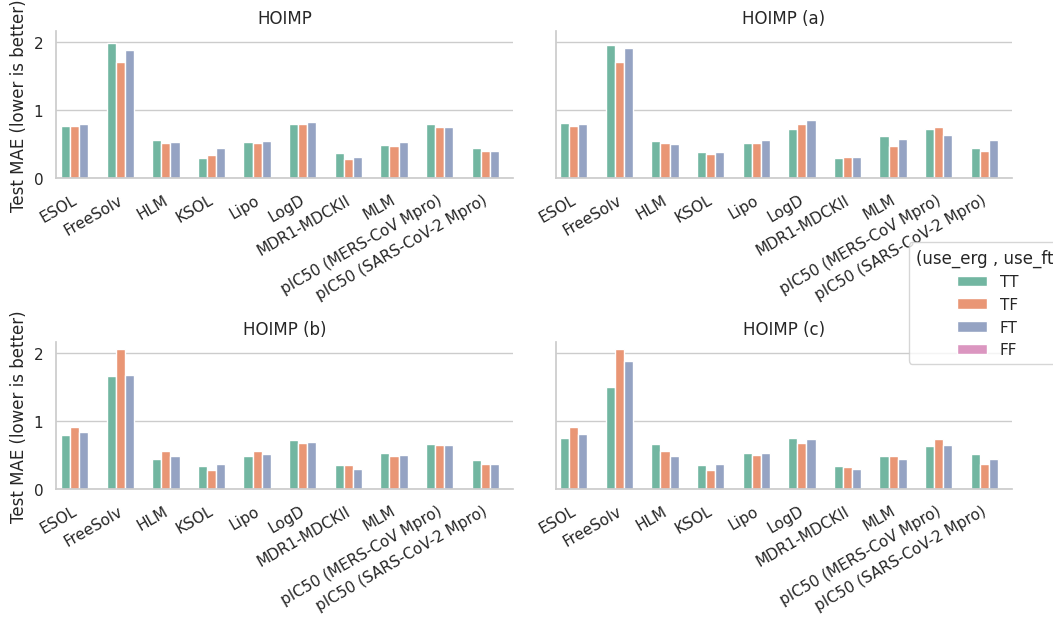

In [15]:
# %% [markdown]
# ## EHIMP family ablation & visualisation
#
# • EHIMP, EHIMP_a, EHIMP_b, EHIMP_c  
# • One best row per (variant, target, use_erg, use_ft) – lowest *mean_val_loss*  
# • Bar height = *mae_test_scaffold* (lower is better)  
# • Hue encodes (use_erg, use_ft) as: TT · TF · FT · FF

# %%
import re, pandas as pd, seaborn as sns, matplotlib.pyplot as plt, numpy as np

EHIMP_REGEX = r"^HOIMP( \([abc]\))?$"
GROUP_COLS  = ["repr_model", "target_task", "use_erg", "use_ft"]
KEEP_COLS   = GROUP_COLS + ["mean_val_loss", "mae_test_scaffold"]

# ── 1. filter EHIMP + variants --------------------------------------------
ehimp = combined[combined["repr_model"].str.match(EHIMP_REGEX)].copy()

# ── 2. keep *best* row in each group (lowest val‑MSE) ----------------------
idx_best = (
    ehimp.groupby(GROUP_COLS)["mean_val_loss"]
         .idxmin()
         .dropna()
         .astype(int)
)
ablation = (
    ehimp.loc[idx_best, KEEP_COLS]
         .sort_values(GROUP_COLS)
         .reset_index(drop=True)
)

# ── 3. build a 2‑letter label for the boolean switch -----------------------
ablation["cfg"] = (
    ablation["use_erg"].map({True: "T", False: "F"}) +
    ablation["use_ft"] .map({True: "T", False: "F"})
)           # TT, TF, FT, FF

# ── 4. (optional) show the table ------------------------------------------
display(ablation.style.format(precision=4).set_caption("EHIMP ablation table"))

# ── 5. bar‑chart visualisation --------------------------------------------
sns.set_theme(style="whitegrid")

cfg_order = ["TT", "TF", "FT", "FF"]

g = sns.FacetGrid(
    data=ablation,
    col="repr_model", col_wrap=2,
    sharex=False,   # each panel shows only its own target_tasks
    height=3.2, aspect=1.4,
)

def bars(data, **kws):
    order = data["target_task"].unique()
    sns.barplot(
        data=data, x="target_task", y="mae_test_scaffold",
        hue="cfg", hue_order=cfg_order,
        order=order, palette="Set2", dodge=True, **kws,
    )

g.map_dataframe(bars)

g.set_axis_labels("", "Test MAE (lower is better)")
g.set_titles("{col_name}")

# ── add and format legend --------------------------------------------------
g.add_legend(title="(use_erg , use_ft)")

# the Legend instance is now stored in g._legend
leg = g._legend                      # <— get the real legend handle
leg.set_bbox_to_anchor((1.02, 0.5))  # place outside right-most facet
leg.set_frame_on(True)


# rotate x‑tick labels for readability
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")

plt.tight_layout()
plt.show()


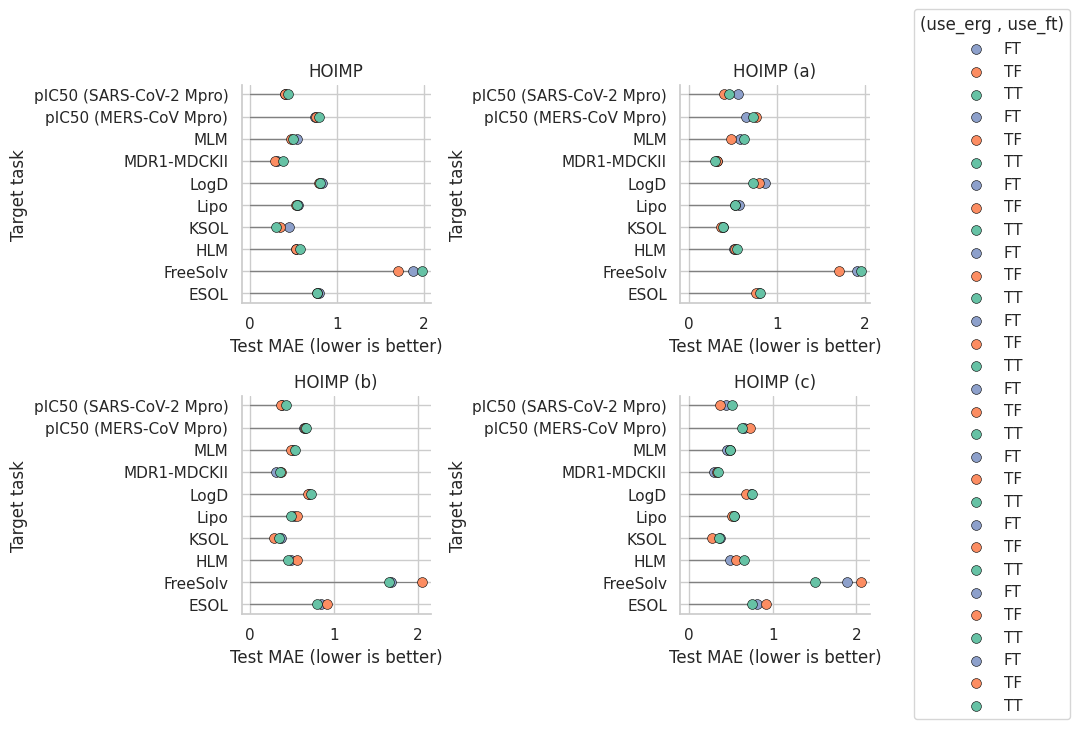

In [16]:
# %%  Lollipop plot ---------------------------------------------------------
import seaborn as sns, matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

cfg_palette = dict(zip(["TT","TF","FT","FF"], sns.color_palette("Set2", 4)))

g = sns.FacetGrid(
    ablation,
    col="repr_model", col_wrap=2, sharex=False, sharey=False,
    height=3.2, aspect=1.4
)

def lollipops(data, **kws):
    order = data["target_task"].unique()
    # draw a thin baseline
    for x in range(len(order)):
        plt.axhline(y=x, color="lightgrey", linewidth=0.4, zorder=0)

    # plot one point per cfg + stem
    for _, row in data.iterrows():
        x = row["mae_test_scaffold"]
        y = np.where(order == row["target_task"])[0][0]
        cfg = row["cfg"]
        plt.plot([0, x], [y, y], color="grey", linewidth=0.8, zorder=1)   # stem
        plt.scatter(x, y, s=50,
                    color=cfg_palette[cfg], edgecolors="black", linewidths=0.4,
                    label=cfg, zorder=2)

    plt.yticks(range(len(order)), order)
    plt.xlabel("Test MAE (lower is better)")
    plt.ylabel("Target task")

g.map_dataframe(lollipops)
g.set_titles("{col_name}")

# only one consolidated legend
handles, labels = g.axes[0].get_legend_handles_labels()
g.fig.legend(handles, labels, title="(use_erg , use_ft)",
             bbox_to_anchor=(1.02, 0.5), loc="center left")
plt.tight_layout()
plt.show()


/tmp/ipykernel_14620/3985172658.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
/tmp/ipykernel_14620/3985172658.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
/tmp/ipykernel_14620/3985172658.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
/tmp/ipykernel_14620/3985172658.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")


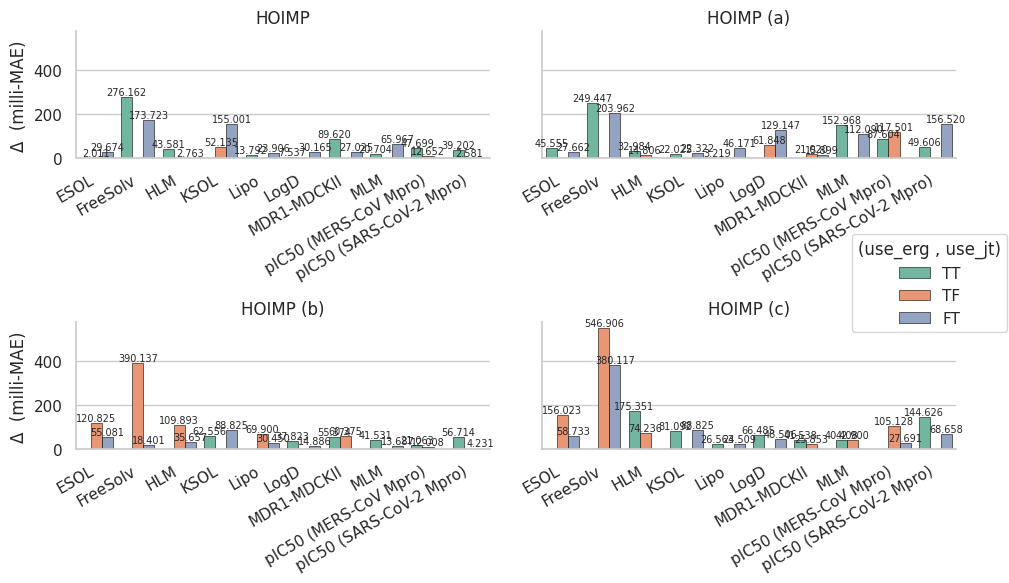

In [17]:
# %% [markdown]
# ## Δ‑bar chart (milli‑MAE)    1  bar = (MAE − best)  × 1000
#
# The best configuration for each (arch,target) is *always* 0.
# All other bars show **how many thousandths** worse they are.
# Even tiny gaps stand out.

# %%
import seaborn as sns, matplotlib.pyplot as plt, numpy as np, pandas as pd

# ── 1. calculate Δ and scale to milli‑MAE ---------------------------------
ablation["delta"] = (
    ablation
      .groupby(["repr_model", "target_task"])["mae_test_scaffold"]
      .transform(lambda s: (s - s.min()) * 1000)   # ×1000 → milli‑MAE
)

# ── 2. facet bar plot ------------------------------------------------------
cfg_order = ["TT", "TF", "FT"]#, "FF"]
sns.set_theme(style="whitegrid")

g = sns.FacetGrid(
    ablation,
    col="repr_model", col_wrap=2,
    sharex=False, sharey=True,          # same y‑scale across all panels
    height=3.0, aspect=1.4
)

def delta_bars(data, **kws):
    order = data["target_task"].unique()
    sns.barplot(
        data=data, x="target_task", y="delta",
        hue="cfg", hue_order=cfg_order,
        order=order, palette="Set2", dodge=True,
        linewidth=0.4, edgecolor="black", **kws
    )
    # annotate bar tops with the raw Δ (×1000) for context
    for p in plt.gca().patches:
        if p.get_height() > 0:
            plt.text(p.get_x()+p.get_width()/2,
                     p.get_height()+0.05,          # a tiny offset
                     f"{p.get_height():.3f}",
                     ha="center", va="bottom", fontsize=7)

g.map_dataframe(delta_bars)

g.set_axis_labels("", "Δ  (milli‑MAE)")
g.set_titles("{col_name}")

# add and format legend
g.add_legend(title="(use_erg , use_jt)")

leg = g._legend                      # <-- actual Legend instance
leg.set_bbox_to_anchor((1.02, 0.5))  # place outside the grid
leg.set_frame_on(True)


for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
    ax.axhline(0, color="grey", linewidth=0.8)     # baseline at 0 = best

plt.tight_layout()
g.savefig("results_ablation_hoimp_erg_ft.pdf", bbox_inches="tight")
plt.show()


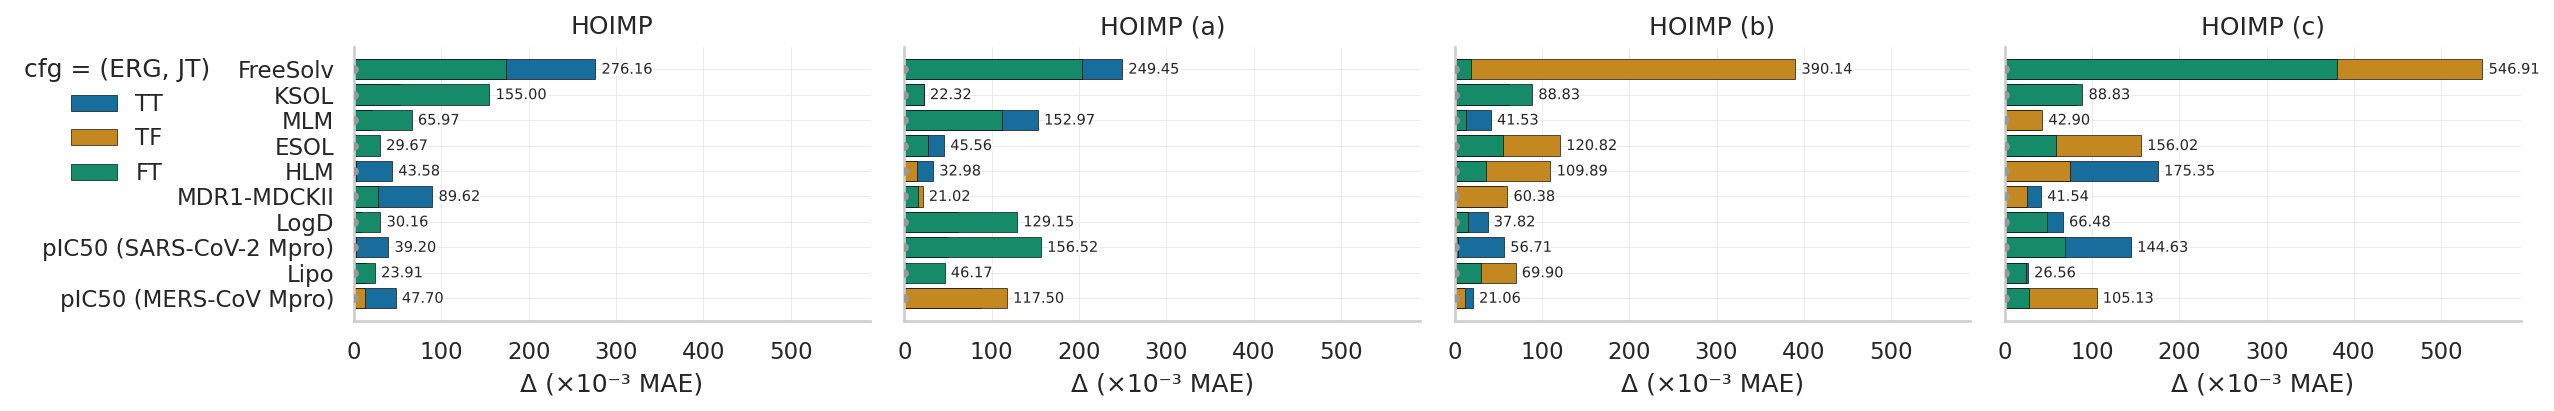

In [18]:
# Δ-bar chart (milli-MAE) — one row, left ticks only, single annotation per task

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe

# --- 0) ensure Δ exists (milli-MAE) ----------------------------------------
if "delta" not in ablation.columns:
    ablation = ablation.copy()
    ablation["delta"] = (
        ablation
        .groupby(["repr_model", "target_task"])["mae_test_scaffold"]
        .transform(lambda s: (s - s.min()) * 1000)
    )

# --- 1) ordering & style ----------------------------------------------------
task_order = (
    ablation.groupby("target_task")["delta"]
    .median().sort_values(ascending=False).index.tolist()
)
cfg_order = ["TT", "TF", "FT"]
palette  = sns.color_palette("colorblind", n_colors=len(cfg_order))

sns.set_theme(style="whitegrid", rc={
    "axes.spines.right": False,
    "axes.spines.top": False,
    "savefig.dpi": 300,
    "figure.dpi": 150,
})

# --- 2) facets in a single row ---------------------------------------------
repr_order = list(ablation["repr_model"].unique())
ncols = len(repr_order)

g = sns.FacetGrid(
    data=ablation.sort_values("delta"),
    col="repr_model", col_order=repr_order, col_wrap=ncols,
    sharex=True, sharey=True,
    height=2.9, aspect=1.35,
    hue="cfg", hue_order=cfg_order, palette=palette
)

def draw_bars(data, **kws):
    ax = plt.gca()
    nz = data.loc[data["delta"] > 0]
    sns.barplot(
        data=nz, y="target_task", x="delta",
        order=task_order, dodge=True,
        edgecolor="black", linewidth=0.3, **kws
    )
    # subtle marker for winners
    zeros = data.loc[data["delta"] <= 0, "target_task"].unique().tolist()
    if zeros:
        y_ix = [task_order.index(t) for t in zeros if t in task_order]
        if y_ix:
            ax.scatter([0]*len(y_ix), y_ix, s=10, color="0.6", zorder=3)

g.map_dataframe(draw_bars)

# --- 3) cosmetics -----------------------------------------------------------
g.set_axis_labels("Δ (×10⁻³ MAE)", "")
g.set_titles("{col_name}")

xmax = float(np.nanmax(ablation["delta"])) if len(ablation) else 0.0
xmax = np.ceil(xmax * 2) / 2

for i, ax in enumerate(g.axes.flat):
    ax.grid(axis="y", linestyle="-", linewidth=0.4, color="0.9")
    ax.grid(axis="x", linestyle="-", linewidth=0.4, color="0.9")
    ax.axvline(0, color="0.5", linewidth=0.8)
    ax.margins(x=0.06)
    ax.set_xlim(0, xmax * 1.08)

# --- 4) single-annotation pass ---------------------------------------------
for ax, repr_name in zip(g.axes.flat, repr_order):
    facet_df = ablation[(ablation["repr_model"] == repr_name) & (ablation["delta"] > 0)]
    if facet_df.empty:
        continue
    max_per_task = (
        facet_df.groupby("target_task", as_index=True)["delta"]
                .max()
                .reindex(task_order)
    )
    x_lo, x_hi = ax.get_xlim()
    xpad = (x_hi - x_lo) * 0.012
    for row_idx, (task, xval) in enumerate(max_per_task.items()):
        if np.isnan(xval):
            continue
        ax.text(
            xval + xpad, row_idx, f"{xval:.2f}",
            va="center", ha="left", fontsize=7, clip_on=False,
            path_effects=[pe.withStroke(linewidth=2, foreground="white")]
        )

# --- 5) y-tick labels only on leftmost -------------------------------------
#left_ax = g.axes.flat[0]
#left_ax.set_yticks(range(len(task_order)))
#left_ax.set_yticklabels(task_order)
#for ax in g.axes.flat[1:]:
#    ax.set_yticks(range(len(task_order)))
#    ax.set_yticklabels([])

# --- 6) legend centered below ----------------------------------------------
g.add_legend(title="cfg = (ERG, JT)")
leg = g._legend
leg.set_bbox_to_anchor((0.04, 0.5), transform=g.fig.transFigure)
try:
    leg.set_loc("lower center")
except AttributeError:
    leg._loc = 8
try:
    leg.set_ncols(len(cfg_order))
except AttributeError:
    pass
leg.set_frame_on(False)

plt.subplots_adjust(bottom=0.18, left=0.18, right=0.98, wspace=0.08)
plt.tight_layout()
g.savefig("results_ablation_hoimp_erg_ft.pdf", bbox_inches="tight")
plt.show()


/tmp/ipykernel_14620/2994863768.py:117: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.97])


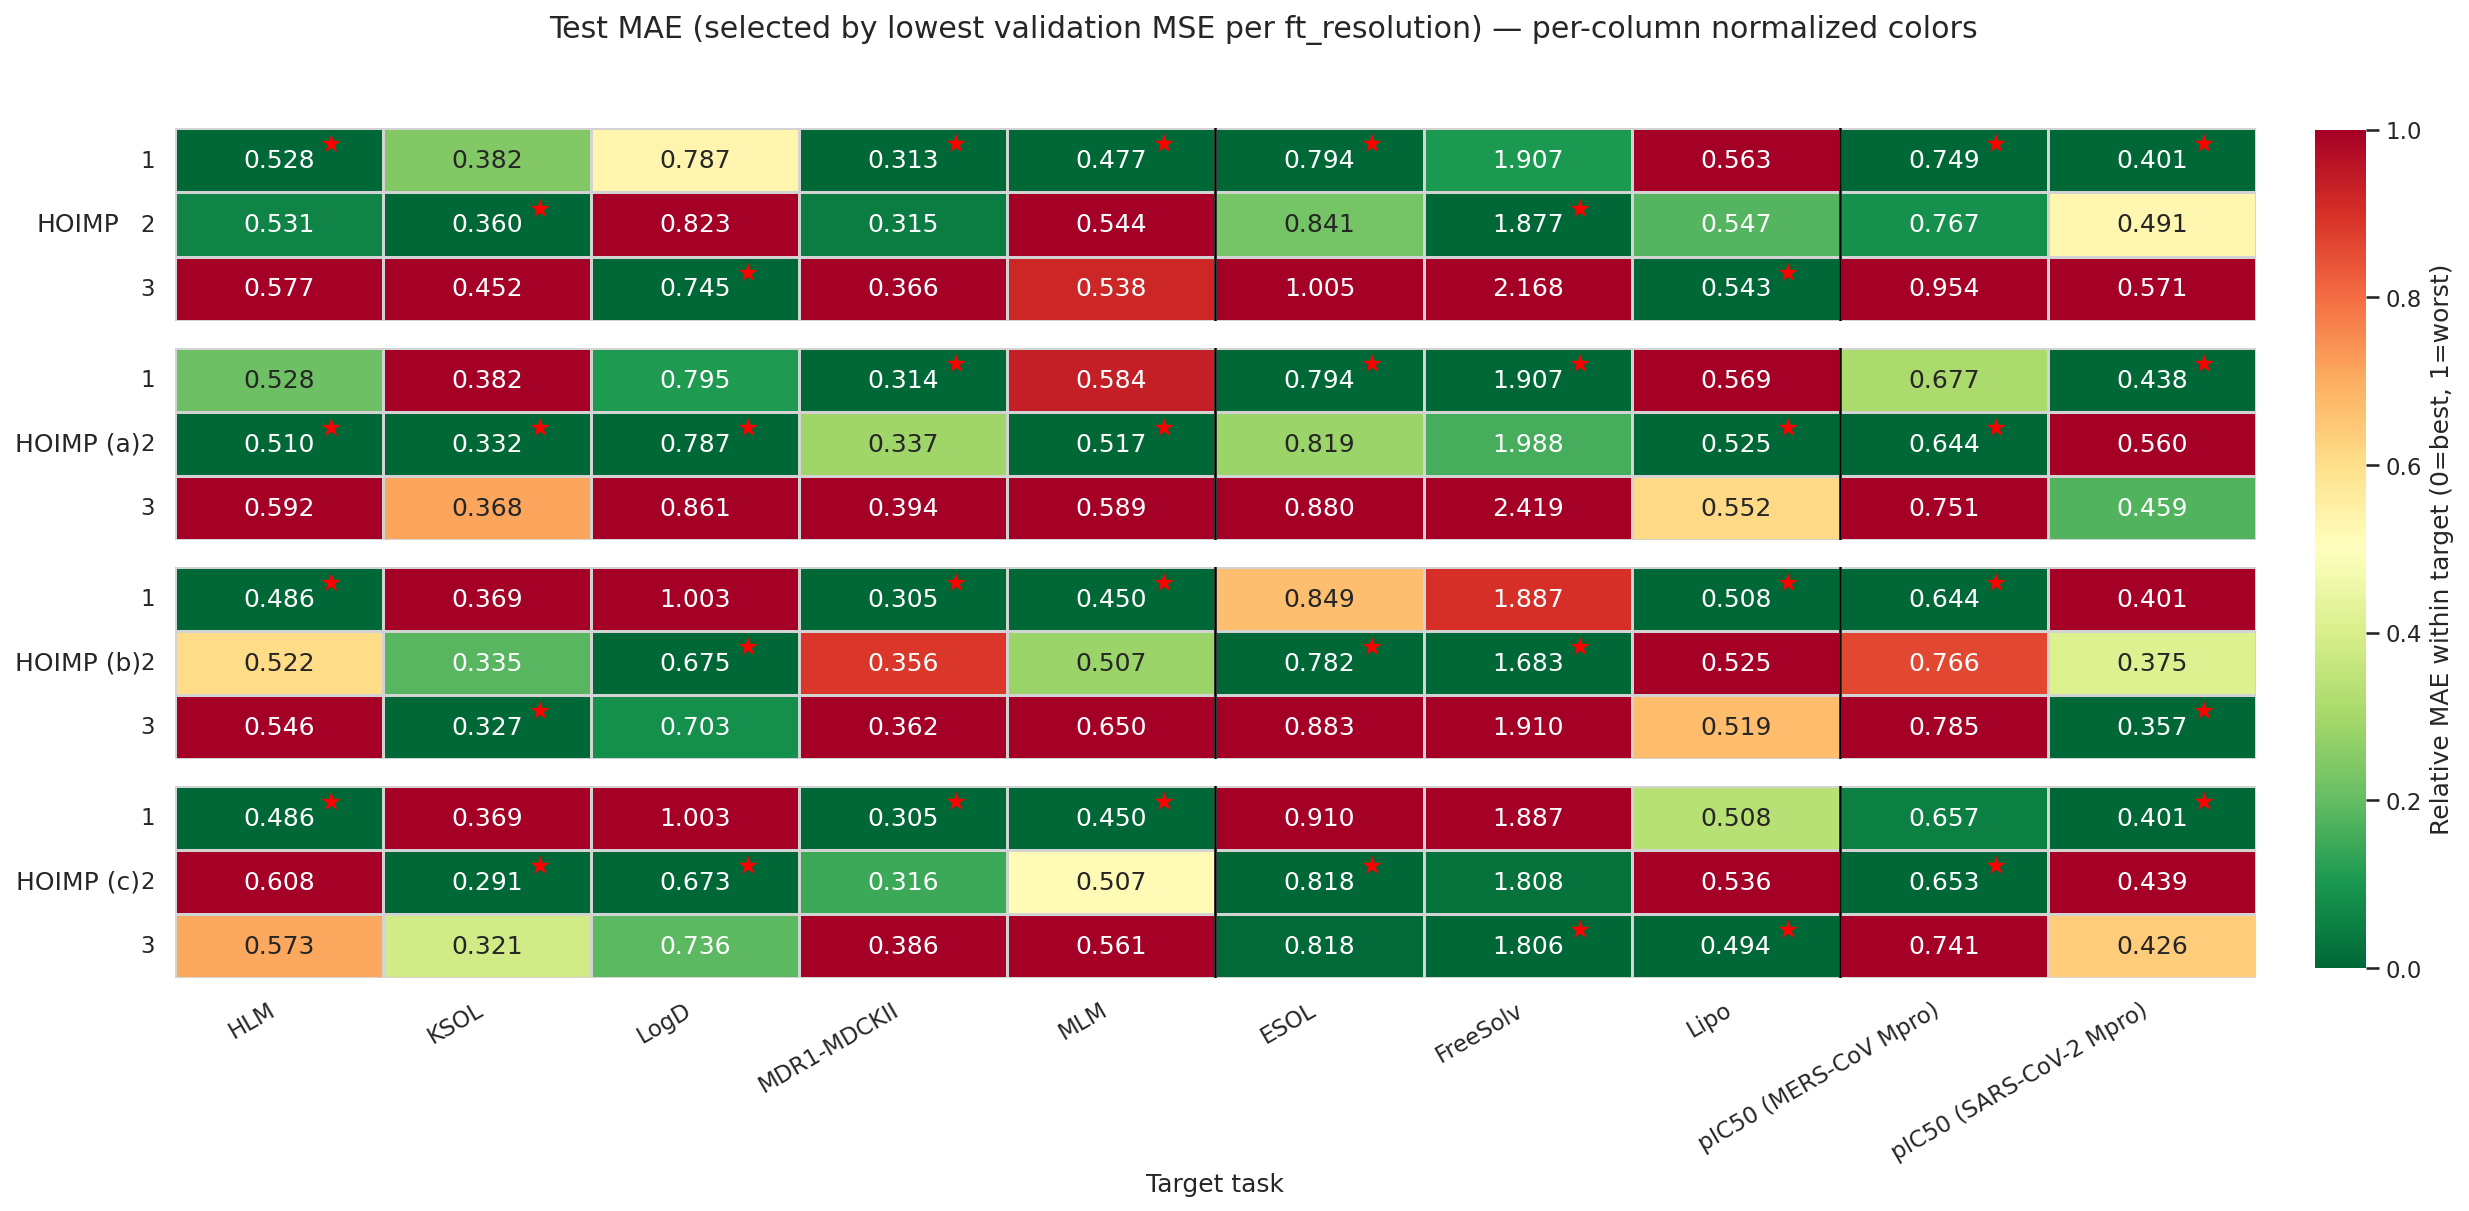

In [19]:
import seaborn as sns, matplotlib.pyplot as plt
import numpy as np, pandas as pd
from copy import deepcopy as dc

# Start from the already renamed `combined` DataFrame
subset = dc(combined)

# Keep only HOIMP variants (adjust names if needed)
subset = subset[subset["repr_model"].isin(["HOIMP", "HOIMP (a)", "HOIMP (b)", "HOIMP (c)"])]
subset = subset[(subset["use_ft"] == True) & (subset["use_erg"] == False)]
# If ft_resolution is only defined for FT-based runs, drop rows without it
subset = subset.dropna(subset=["ft_resolution"])

ARCH_COL = "repr_model"

# ------------------------------------------------------------------
# Build 'best': for each (task, target_task, architecture, ft_resolution),
# pick the config with the lowest validation MSE.
# This ensures we have one row per ft_resolution to pivot later.
# ------------------------------------------------------------------
idx_val = subset.groupby(
    ["task", "target_task", ARCH_COL, "ft_resolution"]
)["mean_val_loss"].idxmin()
best = subset.loc[idx_val].copy()

# Orders for axes
ft_vals = sorted(best["ft_resolution"].unique())
arch_order = sorted(best[ARCH_COL].unique())
target_order = (
    best[["task", "target_task"]]
    .drop_duplicates()
    .sort_values(["task", "target_task"])
)["target_task"].tolist()

sns.set_theme(style="white")

fig, axes = plt.subplots(
    nrows=len(arch_order), ncols=1,
    figsize=(
        1.2 * len(target_order) + 5,
        0.9 * len(ft_vals) * len(arch_order) * 0.75
    ),
    sharex=False, sharey=False
)
if len(arch_order) == 1:
    axes = [axes]

# Add a dedicated axis for the colorbar (left, bottom, width, height)
cbar_ax = fig.add_axes([0.9125, 0.21, 0.02, 0.69])
mid_idx = len(arch_order) // 2  # Put colorbar on the middle architecture

for i, (ax, arch) in enumerate(zip(axes, arch_order)):
    sub = best[best[ARCH_COL] == arch]

    # Pivot: rows = ft_resolution, columns = target_task, values = test MAE
    mat = (
        sub.pivot(index="ft_resolution", columns="target_task", values="mae_test_scaffold")
           .reindex(index=ft_vals, columns=target_order)
    )

    # Per-column normalization (0 = best / min, 1 = worst / max)
    col_min = mat.min(axis=0)
    col_max = mat.max(axis=0)
    denom = (col_max - col_min).replace(0, np.nan)
    norm_mat = (mat - col_min) / denom
    norm_mat = norm_mat.fillna(0.0)

    hm = sns.heatmap(
        norm_mat, ax=ax,
        cmap="RdYlGn_r",
        annot=mat.round(3), fmt=".3f",
        cbar=(i == mid_idx),
        cbar_ax=cbar_ax if i == mid_idx else None,
        linewidths=.5, linecolor="lightgrey",
        vmin=0, vmax=1,
        cbar_kws=dict(label="Relative MAE within target (0=best, 1=worst)") if i == mid_idx else None
    )

    # Mark absolute minima per column (best raw test MAE)
    for j, col in enumerate(mat.columns):
        col_vals = mat[col]
        if col_vals.isna().all():
            continue
        for i_idx in np.where(col_vals == col_vals.min())[0]:
            ax.text(
                j + 0.75, i_idx + 0.25, "★",
                ha="center", va="center",
                color="red", fontsize=12, zorder=5
            )

    ax.set_ylabel(f"{arch}", rotation=0, labelpad=30, va="center")
    ax.set_xlabel("")

    # Draw vertical separators between different 'task' groups
    task_series = (
        best[["target_task", "task"]]
        .drop_duplicates()
        .set_index("target_task")["task"]
        .reindex(mat.columns)
    )
    for idx in range(1, len(mat.columns)):
        if task_series.iloc[idx] != task_series.iloc[idx - 1]:
            ax.axvline(idx, color="black", linewidth=1.2)

    ax.set_yticklabels([str(v) for v in mat.index], rotation=0)
    if arch != arch_order[-1]:
        ax.set_xticklabels([])
    else:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")

axes[-1].set_xlabel("Target task")
fig.suptitle(
    "Test MAE (selected by lowest validation MSE per ft_resolution) — per-column normalized colors",
    y=0.995
)

plt.tight_layout(rect=[0, 0, 0.9, 0.97])
fig.savefig("results_ablation_hoimp_ft_heatmaps.pdf", bbox_inches="tight")
plt.show()


In [20]:
import numpy as np
import pandas as pd
from copy import deepcopy as dc

# ---------- Filter like your plot ----------
subset = dc(combined)
subset = subset[subset["repr_model"].isin(["HOIMP", "HOIMP (a)", "HOIMP (b)", "HOIMP (c)"])]
subset = subset[(subset["use_ft"] == True) & (subset["use_erg"] == False)]
subset = subset.dropna(subset=["ft_resolution"])

ARCH_COL = "repr_model"

# Pick best-by-val-MSE per (task, target, arch, ft)
idx_val = subset.groupby(
    ["task", "target_task", ARCH_COL, "ft_resolution"]
)["mean_val_loss"].idxmin()
best = subset.loc[idx_val].copy()

# Orders
arch_order = ["HOIMP (a)", "HOIMP (b)", "HOIMP (c)", "HOIMP"]  # explicit, adjust if needed
arch_order = [a for a in arch_order if a in best[ARCH_COL].unique()] + \
             [a for a in sorted(best[ARCH_COL].unique()) if a not in arch_order]
ft_vals    = sorted(best["ft_resolution"].unique())

# Normalize task names to catch variants
def _norm_task(s: str) -> str:
    return str(s).strip().lower().replace("-", "_").replace(" ", "_")

best["task_norm"] = best["task"].map(_norm_task)

# Build column groups in canonical order
def _canonical_groups(df):
    groups = []
    if (df["task_norm"] == "admet").any():
        g = (df.loc[df["task_norm"] == "admet", "target_task"]
               .drop_duplicates().sort_values().tolist())
        if g: groups.append(("admet", g))
    if (df["task_norm"] == "potency").any():
        g = (df.loc[df["task_norm"] == "potency", "target_task"]
               .drop_duplicates().sort_values().tolist())
        if g: groups.append(("potency", g))
    mn_mask = df["task_norm"].isin({"molecule_net","moleculenet","molecule__net"})
    if mn_mask.any():
        g = (df.loc[mn_mask, "target_task"]
               .drop_duplicates().sort_values().tolist())
        if g: groups.append(("molecule_net", g))  # merged header
    return groups

col_groups = _canonical_groups(best)

# ---------- helpers ----------
def latex_escape(s: str) -> str:
    return (str(s)
            .replace("\\", r"\textbackslash{}")
            .replace("&", r"\&").replace("%", r"\%").replace("$", r"\$")
            .replace("#", r"\#").replace("_", r"\_")
            .replace("{", r"\{").replace("}", r"\}")
            .replace("~", r"\textasciitilde{}").replace("^", r"\textasciicircum{}"))

def shortstack(text: str) -> str:
    parts = [latex_escape(p) for p in str(text).split("\n")]
    return r"\shortstack[c]{%s}" % r"\\ ".join(parts)

def wrap_target_name(t: str) -> str:
    return t if "\n" in t else t.replace(" (", "\n(")

def disp_target(task_group: str, t: str) -> str:
    if task_group == "potency":
        if "MERS-CoV" in t:   return "pIC50 (a)"
        if "SARS-CoV-2" in t: return "pIC50 (b)"
    return t

def is_mn_norm(x): return x in {"molecule_net","moleculenet","molecule__net"}

# ---------- build combined table ----------
def make_combined_ft_table(decimals=3,
                           caption=("Test MAE across FT resolutions for HOIMP variants. "
                                    "Rows are (Architecture, FT). Columns grouped by admet / potency / molecule_net. "
                                    "For each (Architecture, Target), the best FT is in \\textbf{bold}. "
                                    "Configs selected by lowest validation MSE per (FT, target). Lower is better."),
                           label="tab:ft-hoimp-combined"):

    if best.empty or not col_groups:
        return "% No data for combined FT table."

    # Collect values and per-(arch,target) minima across FT
    # keys: (arch, task_group, target, ft)
    vals = {}
    col_min = {}  # per (arch, task_group, target)
    for arch in arch_order:
        df_a = best[best[ARCH_COL] == arch]
        if df_a.empty: continue
        for task_group, tgts in col_groups:
            for t in tgts:
                # gather series across FT
                series = []
                for ft in ft_vals:
                    if task_group == "molecule_net":
                        sub = df_a[
                            (df_a["task_norm"].map(is_mn_norm)) &
                            (df_a["target_task"] == t) &
                            (df_a["ft_resolution"] == ft)
                        ]
                    else:
                        sub = df_a[
                            (df_a["task_norm"] == task_group) &
                            (df_a["target_task"] == t) &
                            (df_a["ft_resolution"] == ft)
                        ]
                    v = sub["mae_test_scaffold"].iloc[0] if len(sub) else np.nan
                    vals[(arch, task_group, t, ft)] = v
                    series.append(v)
                arr = np.array(series, dtype=float)
                m = np.nanmin(arr) if np.isfinite(arr).any() else np.nan
                col_min[(arch, task_group, t)] = m

    # Alignment: Arch., FT, then one col per target
    n_target_cols = sum(len(tgts) for _, tgts in col_groups)
    align = "l l " + " ".join(["c"] * n_target_cols)

    # cmidrule spans (start after 2 columns: Arch., FT)
    spans = []
    start_col = 3
    for task_group, tgts in col_groups:
        n = len(tgts)
        spans.append((task_group, start_col, start_col + n - 1))
        start_col += n

    # Build LaTeX
    lines = []
    lines.append(r"\begin{table}")
    lines.append(r"\centering")
    lines.append(r"\footnotesize")
    lines.append(r"\begingroup\setlength{\tabcolsep}{4pt}\renewcommand{\arraystretch}{1.04}")
    lines.append(rf"\begin{{NiceTabular}}{{{align}}}[colortbl-like]")
    lines.append(r"\toprule")

    # Header row 1
    h1 = [
        r"\multicolumn{1}{c}{\textbf{Arch.}}",
        r"\multicolumn{1}{c}{\textbf{FT}}",
    ]
    for task_group, s, e in spans:
        h1.append(fr"\multicolumn{{{e - s + 1}}}{{c}}{{\textbf{{{latex_escape(task_group)}}}}}")
    lines.append(" & ".join(h1) + r" \\")
    for _, s, e in spans:
        lines.append(fr"\cmidrule(lr){{{s}-{e}}}")

    # Header row 2: targets
    h2 = ["", ""]
    for task_group, tgts in col_groups:
        for t in tgts:
            h2.append(shortstack(wrap_target_name(disp_target(task_group, t))))
    lines.append(" & ".join(h2) + r" \\")
    lines.append(r"\midrule")

    # Body: iterate rows as (arch, ft)
    row_index = 0
    for arch in arch_order:
        for ft in ft_vals:
            maybe_shade = r"\rowcolor{gray!10} " if (row_index % 2 == 1) else ""
            row_index += 1
            row_cells = [latex_escape(arch), latex_escape(str(ft))]
            for task_group, tgts in col_groups:
                for t in tgts:
                    v = vals.get((arch, task_group, t, ft), np.nan)
                    m = col_min.get((arch, task_group, t), np.nan)
                    best_ft = np.isfinite(m) and np.isclose(v, m, atol=10**(-decimals-2))
                    cell = r"--" if pd.isna(v) else (rf"\textbf{{{v:.{decimals}f}}}" if best_ft else f"{v:.{decimals}f}")
                    row_cells.append(cell)
            lines.append(maybe_shade + " & ".join(row_cells) + r" \\")

    lines.append(r"\bottomrule")
    lines.append(r"\end{NiceTabular}")
    lines.append(r"\endgroup")
    lines.append(fr"\caption{{{latex_escape(caption)}}}")
    lines.append(fr"\label{{{latex_escape(label)}}}")
    lines.append(r"\end{table}")

    return "\n".join(lines)

# -------- Emit the one combined table --------
tex_ft_combined = make_combined_ft_table(decimals=3)
print(tex_ft_combined)


\begin{table}
\centering
\footnotesize
\begingroup\setlength{\tabcolsep}{4pt}\renewcommand{\arraystretch}{1.04}
\begin{NiceTabular}{l l c c c c c c c c c c}[colortbl-like]
\toprule
\multicolumn{1}{c}{\textbf{Arch.}} & \multicolumn{1}{c}{\textbf{FT}} & \multicolumn{5}{c}{\textbf{admet}} & \multicolumn{2}{c}{\textbf{potency}} & \multicolumn{3}{c}{\textbf{molecule\_net}} \\
\cmidrule(lr){3-7}
\cmidrule(lr){8-9}
\cmidrule(lr){10-12}
 &  & \shortstack[c]{HLM} & \shortstack[c]{KSOL} & \shortstack[c]{LogD} & \shortstack[c]{MDR1-MDCKII} & \shortstack[c]{MLM} & \shortstack[c]{pIC50\\ (a)} & \shortstack[c]{pIC50\\ (b)} & \shortstack[c]{ESOL} & \shortstack[c]{FreeSolv} & \shortstack[c]{Lipo} \\
\midrule
HOIMP (a) & 1 & 0.528 & 0.382 & 0.795 & \textbf{0.314} & 0.584 & 0.677 & \textbf{0.438} & \textbf{0.794} & \textbf{1.907} & 0.569 \\
\rowcolor{gray!10} HOIMP (a) & 2 & \textbf{0.510} & \textbf{0.332} & \textbf{0.787} & 0.337 & \textbf{0.517} & \textbf{0.644} & 0.560 & 0.819 & 1.988 & \textbf{0.525

/tmp/ipykernel_14620/2980261678.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


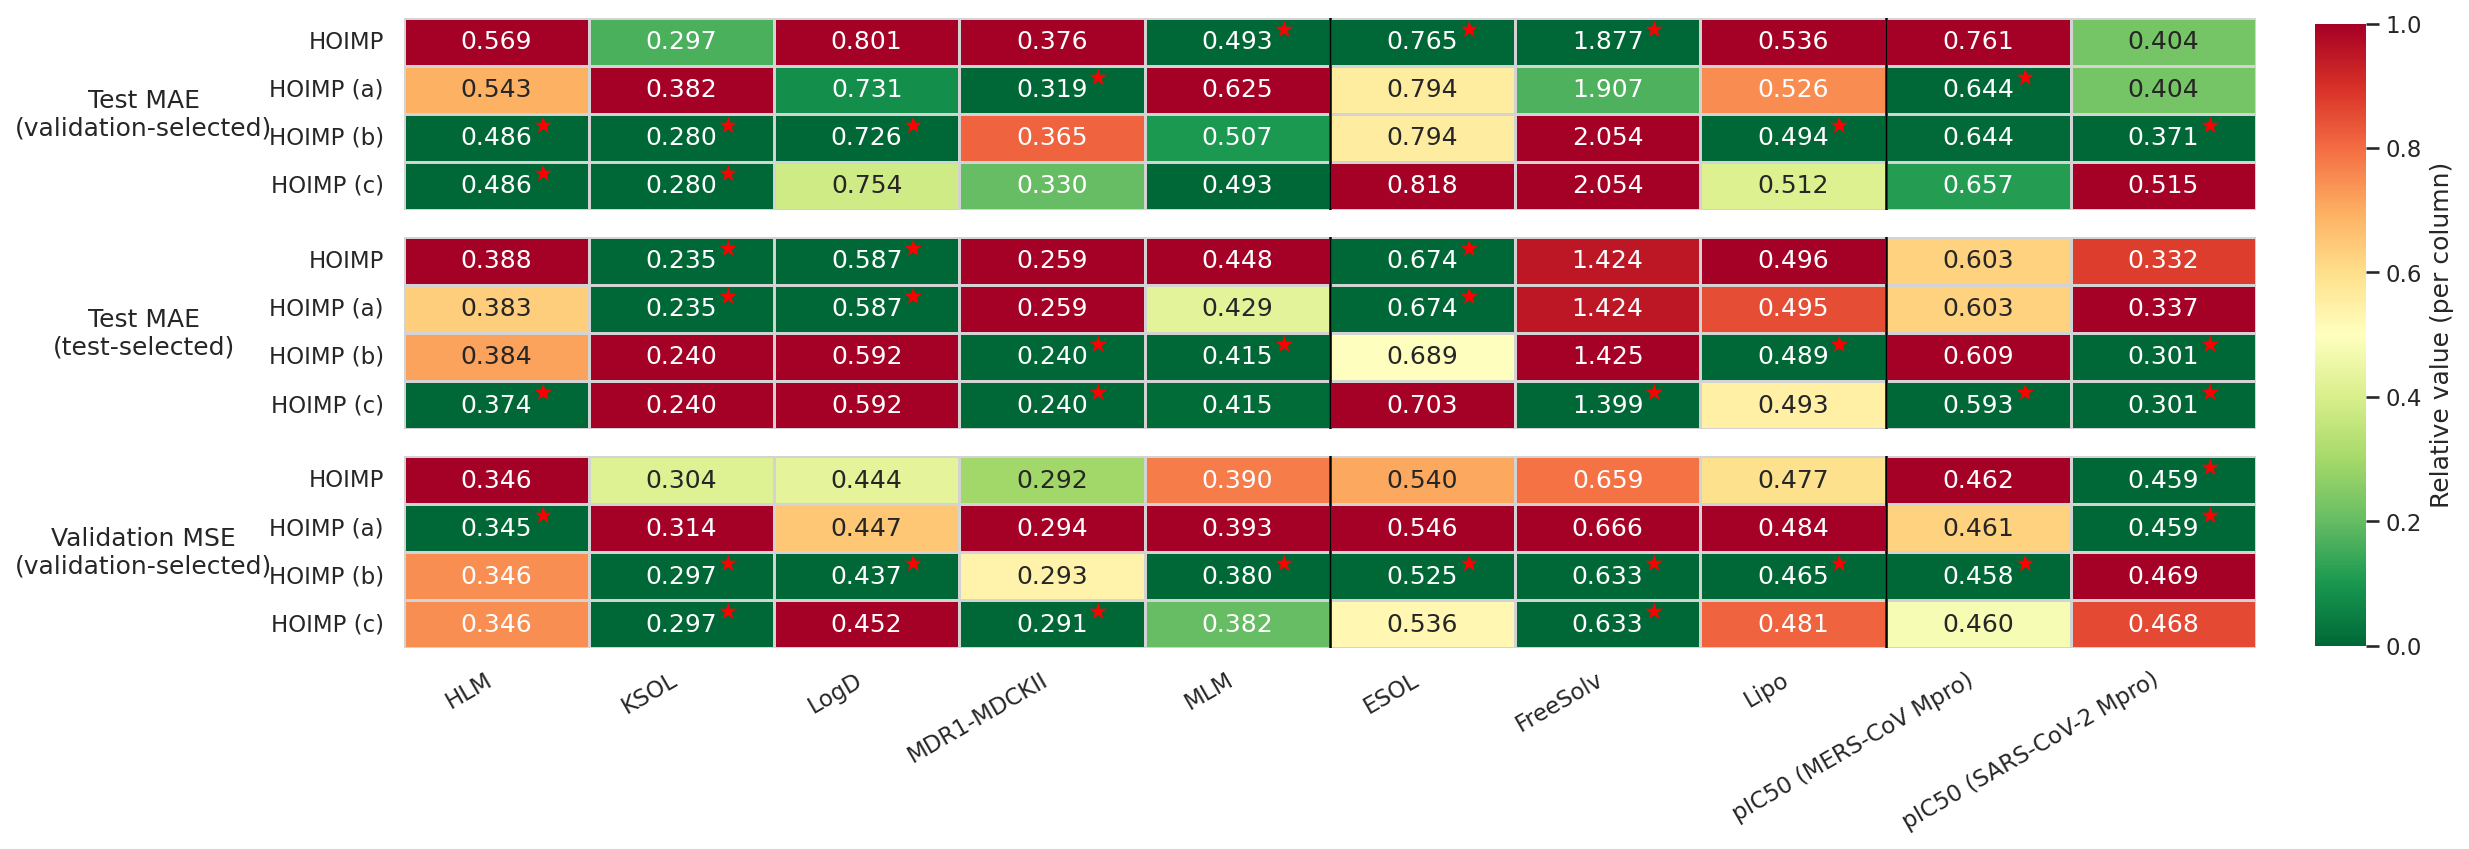

/tmp/ipykernel_14620/2980261678.py:236: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


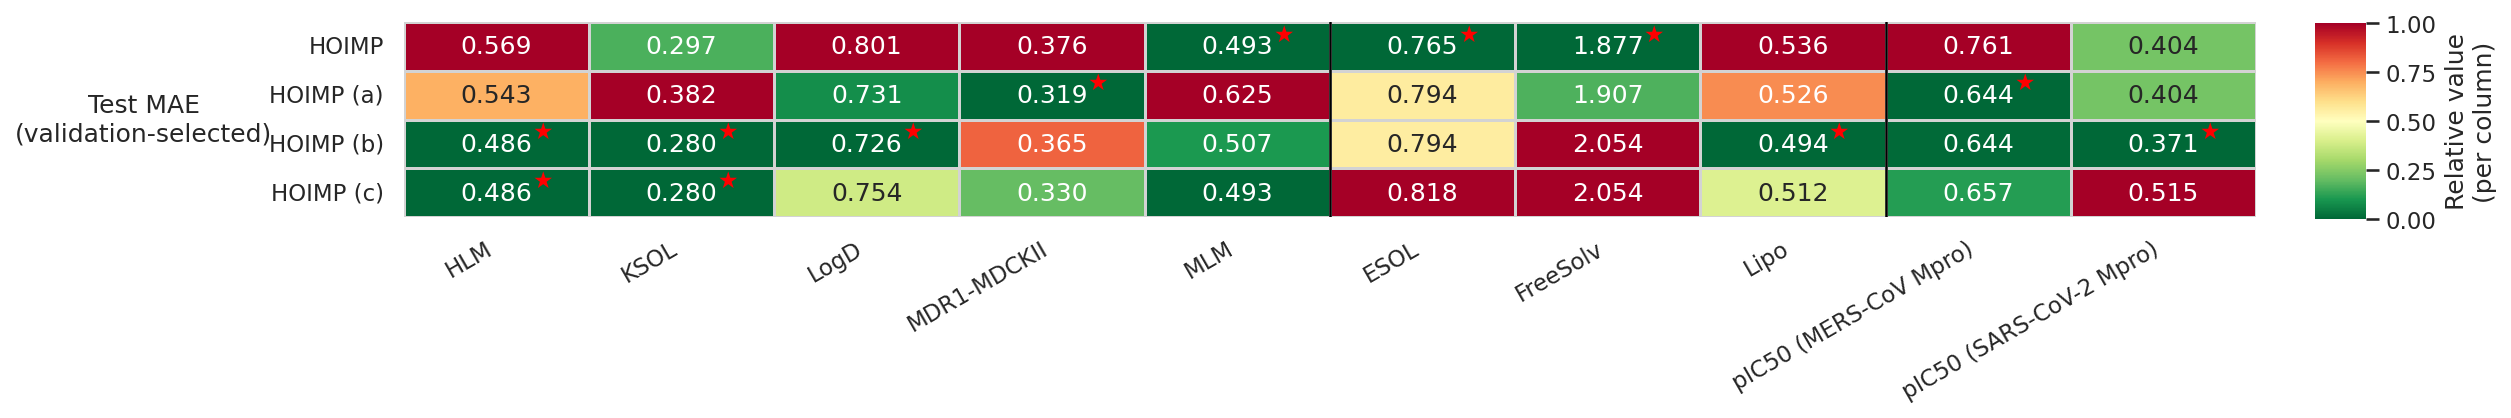

In [21]:
import seaborn as sns, matplotlib.pyplot as plt
import numpy as np, pandas as pd
from copy import deepcopy as dc

subset = dc(combined)
subset = subset[
    subset["repr_model"].isin(["HOIMP (a)", "HOIMP (b)", "HOIMP (c)", "HOIMP"])
]

ARCH_COL = "repr_model"

# ---- select configs --------------------------------------------------
# Selected by lowest validation MSE
idx_val = subset.groupby(["task", "target_task", ARCH_COL])["mean_val_loss"].idxmin()
best_val = subset.loc[idx_val].copy()

# Selected by lowest test MAE
idx_mae = subset.groupby(["task", "target_task", ARCH_COL])["mae_test_scaffold"].idxmin()
best_mae = subset.loc[idx_mae].copy()

# Build three labeled tables
val_selected_test_mae = best_val.copy()
val_selected_test_mae["criterion"] = "Test MAE\n(validation-selected)"

test_selected_test_mae = best_mae.copy()
test_selected_test_mae["criterion"] = "Test MAE\n(test-selected)"

val_selected_val_mse = best_val.copy()
val_selected_val_mse["criterion"] = "Validation MSE\n(validation-selected)"

plot_data = pd.concat(
    [val_selected_test_mae, test_selected_test_mae, val_selected_val_mse],
    ignore_index=True
)

# Assign metric per row
plot_data["metric"] = np.select(
    [
        plot_data["criterion"] == "Test MAE\n(validation-selected)",
        plot_data["criterion"] == "Test MAE\n(test-selected)",
        plot_data["criterion"] == "Validation MSE\n(validation-selected)",
    ],
    [
        plot_data["mae_test_scaffold"],        # test MAE of val-selected config
        plot_data["mae_test_scaffold"],        # test MAE of test-selected config
        plot_data["mean_val_loss"],            # validation MSE of val-selected config
    ]
)

crit_order = [
    "Test MAE\n(validation-selected)",
    "Test MAE\n(test-selected)",
    "Validation MSE\n(validation-selected)"
]

target_order = (
    plot_data[["task","target_task"]]
    .drop_duplicates()
    .sort_values(["task","target_task"])
)["target_task"].tolist()
arch_order = sorted(plot_data[ARCH_COL].unique())

sns.set_theme(style="white")

fig, axes = plt.subplots(
    nrows=len(crit_order), ncols=1,
    figsize=(1.2*len(target_order)+5, 1.2*len(arch_order)+1),
    sharex=False, sharey=True
)
if len(crit_order) == 1:
    axes = [axes]

# Colorbar axis
cbar_ax = fig.add_axes([0.9125, 0.2475, 0.02, 0.715])
mid_idx = len(crit_order) // 2

for i, (ax, crit) in enumerate(zip(axes, crit_order)):
    sub = plot_data[plot_data["criterion"] == crit]
    mat = (
        sub.pivot(index=ARCH_COL, columns="target_task", values="metric")
           .reindex(index=arch_order, columns=target_order)
    )

    # per-column normalization
    col_min = mat.min(axis=0)
    col_max = mat.max(axis=0)
    denom = (col_max - col_min).replace(0, np.nan)
    norm_mat = (mat - col_min) / denom
    norm_mat = norm_mat.fillna(0.0)

    hm = sns.heatmap(
        norm_mat, ax=ax,
        cmap="RdYlGn_r",
        annot=mat.round(3), fmt=".3f",
        cbar=(i == mid_idx),
        cbar_ax=cbar_ax if i == mid_idx else None,
        vmin=0, vmax=1,
        linewidths=.5, linecolor="lightgrey",
        cbar_kws=dict(label="Relative value (per column)") if i == mid_idx else None
    )

    # Mark absolute minima per column (best raw values)
    for j, col in enumerate(mat.columns):
        vals = mat[col]
        if vals.isna().all():
            continue
        for i_idx in np.where(vals == vals.min())[0]:
            ax.text(j+0.75, i_idx+0.25, "★",
                    ha="center", va="center",
                    color="red", fontsize=11, zorder=5)

    ax.set_ylabel(crit, rotation=0, labelpad=60, va="center")
    ax.set_xlabel("")

    # Task separators
    task_series = (
        plot_data[["target_task","task"]]
        .drop_duplicates()
        .set_index("target_task")["task"]
        .reindex(mat.columns)
    )
    for idx in range(1, len(mat.columns)):
        if task_series.iloc[idx] != task_series.iloc[idx-1]:
            ax.axvline(idx, color="black", linewidth=1.2)

    if crit != crit_order[-1]:
        ax.set_xticklabels([])
    else:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout(rect=[0, 0, 0.9, 1])
fig.savefig("results_ablation_hoimp_heatmaps.pdf", bbox_inches="tight")
plt.show()


## BELOW WITH JUST THE FIRST COUPLE OF ROWS
import seaborn as sns, matplotlib.pyplot as plt
import numpy as np, pandas as pd
from copy import deepcopy as dc

subset = dc(combined)
subset = subset[subset["repr_model"].isin(["HOIMP (a)", "HOIMP (b)", "HOIMP (c)", "HOIMP"])]

ARCH_COL = "repr_model"

# ---- pick configs selected by lowest validation MSE -----------------------
idx_val = subset.groupby(["task", "target_task", ARCH_COL])["mean_val_loss"].idxmin()
best_val = subset.loc[idx_val].copy()

# Build the single table we want to plot
val_selected_test_mae = best_val.copy()
val_selected_test_mae["criterion"] = "Test MAE\n(validation-selected)"
plot_data = val_selected_test_mae.copy()

# The metric to display is test MAE
plot_data["metric"] = plot_data["mae_test_scaffold"]

# Orders
target_order = (
    plot_data[["task","target_task"]]
    .drop_duplicates()
    .sort_values(["task","target_task"])
)["target_task"].tolist()

arch_order = sorted(plot_data[ARCH_COL].unique())

# (Optional) keep only the first 4 architectures/rows:
arch_order = arch_order[:4]

sns.set_theme(style="white")

# Single-row figure
fig, ax = plt.subplots(
    nrows=1, ncols=1,
    figsize=(1.2*len(target_order)+5, (1.2*len(arch_order)+1)*0.5),
    sharex=False, sharey=True
)

# >>> Adjustable colorbar axis (figure coords: left, bottom, width, height)
cbar_ax = fig.add_axes([0.9125, 0.485, 0.02, 0.45])#fig.add_axes([CBAR_LEFT, CBAR_BOTTOM, CBAR_WIDTH, CBAR_HEIGHT])
# <<<

# Pivot to matrix (arch x target)
mat = (
    plot_data.pivot(index=ARCH_COL, columns="target_task", values="metric")
             .reindex(index=arch_order, columns=target_order)
)

# Per-column normalization (for colors only)
col_min = mat.min(axis=0)
col_max = mat.max(axis=0)
denom   = (col_max - col_min).replace(0, np.nan)
norm_mat = (mat - col_min) / denom
norm_mat = norm_mat.fillna(0.0)

# Draw heatmap (values are raw MAE, colors are normalized per column)
hm = sns.heatmap(
    norm_mat, ax=ax,
    cmap="RdYlGn_r",
    annot=mat.round(3), fmt=".3f",
    cbar=True, linewidths=.5, linecolor="lightgrey",
    vmin=0, vmax=1,
    cbar_kws=dict(label="Relative value\n(per column)"),
    cbar_ax=cbar_ax   # <<< use the adjustable colorbar axis
)

# Mark absolute minima per column (best raw values)
for j, col in enumerate(mat.columns):
    vals = mat[col]
    if vals.isna().all():
        continue
    for i_idx in np.where(vals == vals.min())[0]:
        ax.text(j+0.75, i_idx+0.25, "★",
                ha="center", va="center",
                color="red", fontsize=11, zorder=5)

ax.set_ylabel("Test MAE\n(validation-selected)", rotation=0, labelpad=60, va="center")
ax.set_xlabel("")

# Vertical separators between high-level tasks
task_series = (
    plot_data[["target_task","task"]]
    .drop_duplicates()
    .set_index("target_task")["task"]
    .reindex(mat.columns)
)
for idx in range(1, len(mat.columns)):
    if task_series.iloc[idx] != task_series.iloc[idx-1]:
        ax.axvline(idx, color="black", linewidth=1.2)

# Nice tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout(rect=[0, 0, 0.9, 1])
fig.savefig("results_ablation_hoimp_heatmaps.pdf", bbox_inches="tight")
plt.show()



In [22]:
import numpy as np
import pandas as pd
from copy import deepcopy as dc

# ----------------- Select only HOIMP variants -----------------
subset = dc(combined)
subset = subset[subset["repr_model"].isin(["HOIMP (a)", "HOIMP (b)", "HOIMP (c)", "HOIMP"])]
ARCH_COL = "repr_model"

# ---- choose configs -----------------
# (A) By lowest validation MSE
idx_val = subset.groupby(["task", "target_task", ARCH_COL])["mean_val_loss"].idxmin()
best_val = subset.loc[idx_val].copy()

# (B) By lowest test MAE
idx_mae = subset.groupby(["task", "target_task", ARCH_COL])["mae_test_scaffold"].idxmin()
best_mae = subset.loc[idx_mae].copy()

# Build labelled frames (same semantics as your plots)
val_selected_test_mae = best_val.copy(); val_selected_test_mae["criterion"] = "Test MAE (val-sel)"
test_selected_test_mae = best_mae.copy(); test_selected_test_mae["criterion"] = "Test MAE (test-sel)"
val_selected_val_mse   = best_val.copy(); val_selected_val_mse["criterion"]   = "Val MSE (val-sel)"

plot_data = pd.concat(
    [val_selected_test_mae, test_selected_test_mae, val_selected_val_mse],
    ignore_index=True
)

# Metric to display per row
plot_data["metric"] = np.select(
    [
        plot_data["criterion"] == "Test MAE (val-sel)",
        plot_data["criterion"] == "Test MAE (test-sel)",
        plot_data["criterion"] == "Val MSE (val-sel)",
    ],
    [
        plot_data["mae_test_scaffold"],   # test MAE of val-selected config
        plot_data["mae_test_scaffold"],   # test MAE of test-selected config
        plot_data["mean_val_loss"],       # validation MSE of val-selected config
    ]
)

# De-dup just in case
plot_data = plot_data.drop_duplicates(
    subset=[ARCH_COL, "task", "target_task", "criterion"], keep="first"
)

arch_order  = ["HOIMP (a)", "HOIMP (b)", "HOIMP (c)", "HOIMP"]  # explicit row order
crit_order3 = ["Test MAE (val-sel)", "Test MAE (test-sel)", "Val MSE (val-sel)"]
crit_order1 = ["Test MAE (val-sel)"]

# ----------------- helpers -----------------
def latex_escape(s: str) -> str:
    return (str(s)
        .replace("\\", r"\textbackslash{}")
        .replace("&", r"\&").replace("%", r"\%").replace("$", r"\$")
        .replace("#", r"\#").replace("_", r"\_")
        .replace("{", r"\{").replace("}", r"\}")
        .replace("~", r"\textasciitilde{}").replace("^", r"\textasciicircum{}"))

def shortstack(text: str) -> str:
    parts = [latex_escape(p) for p in str(text).split("\n")]
    return r"\shortstack[c]{%s}" % r"\\ ".join(parts)

def wrap_target_name(t: str) -> str:
    # Narrower headers: split before '(' if present
    return t if "\n" in t else t.replace(" (", "\n(")

def _stack3(v1, v2, v3, b1=False, b2=False, b3=False, decimals=3):
    def fmt(v, b):
        s = r"--" if pd.isna(v) else f"{v:.{decimals}f}"
        return rf"\textbf{{{s}}}" if b and s != r"--" else s
    return (r"\begin{tabular}{@{}c@{}}"
            + fmt(v1, b1) + r" \\ "
            + fmt(v2, b2) + r" \\ "
            + fmt(v3, b3)
            + r"\end{tabular}")

# ----------------- generic emitter -----------------
def make_hoimp_table(crit_order, *, caption, label, decimals=3):
    # Restrict to desired criteria
    pdta = plot_data[plot_data["criterion"].isin(crit_order)].copy()
    if pdta.empty:
        return f"% No rows for criteria={crit_order}"

    # Keep only tasks we care about (but only those that exist)
    wanted_tasks = ["admet", "potency", "molecule_net"]
    pdta = pdta[pdta["task"].isin(wanted_tasks)]
    if pdta.empty:
        return "% No admet/potency/moleculenet rows for HOIMP subset."

    # Targets grouped by task (order: admet, potency, moleculenet; per-target alphabetical)
    target_by_task = (
        pdta[["task","target_task"]]
        .drop_duplicates()
        .sort_values(["task","target_task"])
    )
    col_groups = []
    for task in wanted_tasks:
        tgts = target_by_task.loc[target_by_task["task"] == task, "target_task"].tolist()
        if tgts:
            col_groups.append((task, tgts))

    # Precompute minima per (task, target, criterion) across HOIMP rows
    values = {arch: {} for arch in arch_order}
    col_min = {}
    for (task, tgts) in col_groups:
        for t in tgts:
            for c in crit_order:
                col_min[(task, t, c)] = np.inf
    for arch in arch_order:
        sub_arch = pdta[pdta[ARCH_COL] == arch]
        for (task, tgts) in col_groups:
            for t in tgts:
                sub = sub_arch[(sub_arch["task"] == task) & (sub_arch["target_task"] == t)]
                for c in crit_order:
                    v = sub.loc[sub["criterion"] == c, "metric"]
                    v = v.iloc[0] if len(v) else np.nan
                    values[arch][(task, t, c)] = v
                    if not pd.isna(v):
                        col_min[(task, t, c)] = min(col_min[(task, t, c)], v)

    # cmidrule spans
    spans = []
    start_col = 2
    for (task, tgts) in col_groups:
        n = len(tgts)
        spans.append((task, start_col, start_col + n - 1))
        start_col += n

    # Column alignment
    n_cols = sum(len(tgts) for _, tgts in col_groups)
    align = "l " + " ".join(["c"] * n_cols)

    # Build LaTeX
    lines = []
    lines.append(r"\begin{table}")
    lines.append(r"\centering")
    lines.append(r"\footnotesize")
    lines.append(r"\begingroup\setlength{\tabcolsep}{4pt}\renewcommand{\arraystretch}{1.04}")
    lines.append(rf"\begin{{NiceTabular}}{{{align}}}[colortbl-like]")
    lines.append(r"\toprule")

    # Header row 1: task groups
    h1 = [r"\multicolumn{1}{c}{\textbf{Arch.}}"]
    for task, s, e in spans:
        h1.append(fr"\multicolumn{{{e - s + 1}}}{{c}}{{\textbf{{{latex_escape(task)}}}}}")
    lines.append(" & ".join(h1) + r" \\")
    for _, s, e in spans:
        lines.append(fr"\cmidrule(lr){{{s}-{e}}}")

    # Header row 2: wrapped target names (and potency short labels)
    def disp(task, t):
        if task == "potency":
            if "MERS-CoV" in t:  return "pIC50 (a)"
            if "SARS-CoV-2" in t: return "pIC50 (b)"
        return t
    h2 = [""]
    for (task, tgts) in col_groups:
        for t in tgts:
            h2.append(shortstack(wrap_target_name(disp(task, t))))
    lines.append(" & ".join(h2) + r" \\")
    lines.append(r"\midrule")

    # Body rows
    for i, arch in enumerate(arch_order):
        maybe = r"\rowcolor{gray!10} " if (i % 2 == 1) else ""
        row_cells = [latex_escape(arch)]
        for (task, tgts) in col_groups:
            for t in tgts:
                if len(crit_order) == 1:
                    # Single-criterion table: just one number per cell
                    c = crit_order[0]
                    v = values[arch].get((task, t, c), np.nan)
                    m = col_min[(task, t, c)]
                    best = np.isfinite(m) and np.isclose(v, m, atol=10**(-decimals-2))
                    cell = r"--" if pd.isna(v) else (rf"\textbf{{{v:.{decimals}f}}}" if best else f"{v:.{decimals}f}")
                    row_cells.append(cell)
                else:
                    # Three-criterion stacked cell
                    v1 = values[arch].get((task, t, "Test MAE (val-sel)"), np.nan)
                    v2 = values[arch].get((task, t, "Test MAE (test-sel)"), np.nan)
                    v3 = values[arch].get((task, t, "Val MSE (val-sel)"), np.nan)
                    b1 = np.isfinite(col_min[(task, t, "Test MAE (val-sel)")])  and np.isclose(v1, col_min[(task, t, "Test MAE (val-sel)")],  atol=10**(-decimals-2))
                    b2 = np.isfinite(col_min[(task, t, "Test MAE (test-sel)")]) and np.isclose(v2, col_min[(task, t, "Test MAE (test-sel)")], atol=10**(-decimals-2))
                    b3 = np.isfinite(col_min[(task, t, "Val MSE (val-sel)")])   and np.isclose(v3, col_min[(task, t, "Val MSE (val-sel)")],   atol=10**(-decimals-2))
                    row_cells.append(_stack3(v1, v2, v3, b1, b2, b3, decimals=decimals))
        lines.append(maybe + " & ".join(row_cells) + r" \\")

    lines.append(r"\bottomrule")
    lines.append(r"\end{NiceTabular}")
    lines.append(r"\endgroup")
    lines.append(fr"\caption{{{latex_escape(caption)}}}")
    lines.append(fr"\label{{{latex_escape(label)}}}")
    lines.append(r"\end{table}")

    return "\n".join(lines)

# ----------------- Emit BOTH HOIMP tables -----------------
# (1) Full 3-criteria table (matches the 3-row heatmap figure)
tex_hoimp_allcrit = make_hoimp_table(
    crit_order3,
    caption=("HOIMP ablation (a/b/c/base) on ADMET, potency, and MoleculeNet. "
             "Cells show Test MAE (val-sel) / Test MAE (test-sel) / Val MSE (val-sel). "
             "Lower is better. pIC50 (a)=MERS-CoV Mpro, pIC50 (b)=SARS-CoV-2 Mpro."),
    label="tab:hoimp-ablation-all"
)
print(tex_hoimp_allcrit, "\n")

# (2) Single-criterion table = Test MAE (validation-selected) only
tex_hoimp_valsel = make_hoimp_table(
    crit_order1,
    caption=("HOIMP ablation (a/b/c/base) — Test MAE (validation-selected) only. "
             "Lower is better. pIC50 (a)=MERS-CoV Mpro, pIC50 (b)=SARS-CoV-2 Mpro."),
    label="tab:hoimp-ablation-valsel"
)
print(tex_hoimp_valsel)


\begin{table}
\centering
\footnotesize
\begingroup\setlength{\tabcolsep}{4pt}\renewcommand{\arraystretch}{1.04}
\begin{NiceTabular}{l c c c c c c c c c c}[colortbl-like]
\toprule
\multicolumn{1}{c}{\textbf{Arch.}} & \multicolumn{5}{c}{\textbf{admet}} & \multicolumn{2}{c}{\textbf{potency}} & \multicolumn{3}{c}{\textbf{molecule\_net}} \\
\cmidrule(lr){2-6}
\cmidrule(lr){7-8}
\cmidrule(lr){9-11}
 & \shortstack[c]{HLM} & \shortstack[c]{KSOL} & \shortstack[c]{LogD} & \shortstack[c]{MDR1-MDCKII} & \shortstack[c]{MLM} & \shortstack[c]{pIC50\\ (a)} & \shortstack[c]{pIC50\\ (b)} & \shortstack[c]{ESOL} & \shortstack[c]{FreeSolv} & \shortstack[c]{Lipo} \\
\midrule
HOIMP (a) & \begin{tabular}{@{}c@{}}0.543 \\ 0.383 \\ \textbf{0.345}\end{tabular} & \begin{tabular}{@{}c@{}}0.382 \\ \textbf{0.235} \\ 0.314\end{tabular} & \begin{tabular}{@{}c@{}}0.731 \\ \textbf{0.587} \\ 0.447\end{tabular} & \begin{tabular}{@{}c@{}}\textbf{0.319} \\ 0.259 \\ 0.294\end{tabular} & \begin{tabular}{@{}c@{}}0.625 \\ 0.429

/tmp/ipykernel_14620/456819427.py:144: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


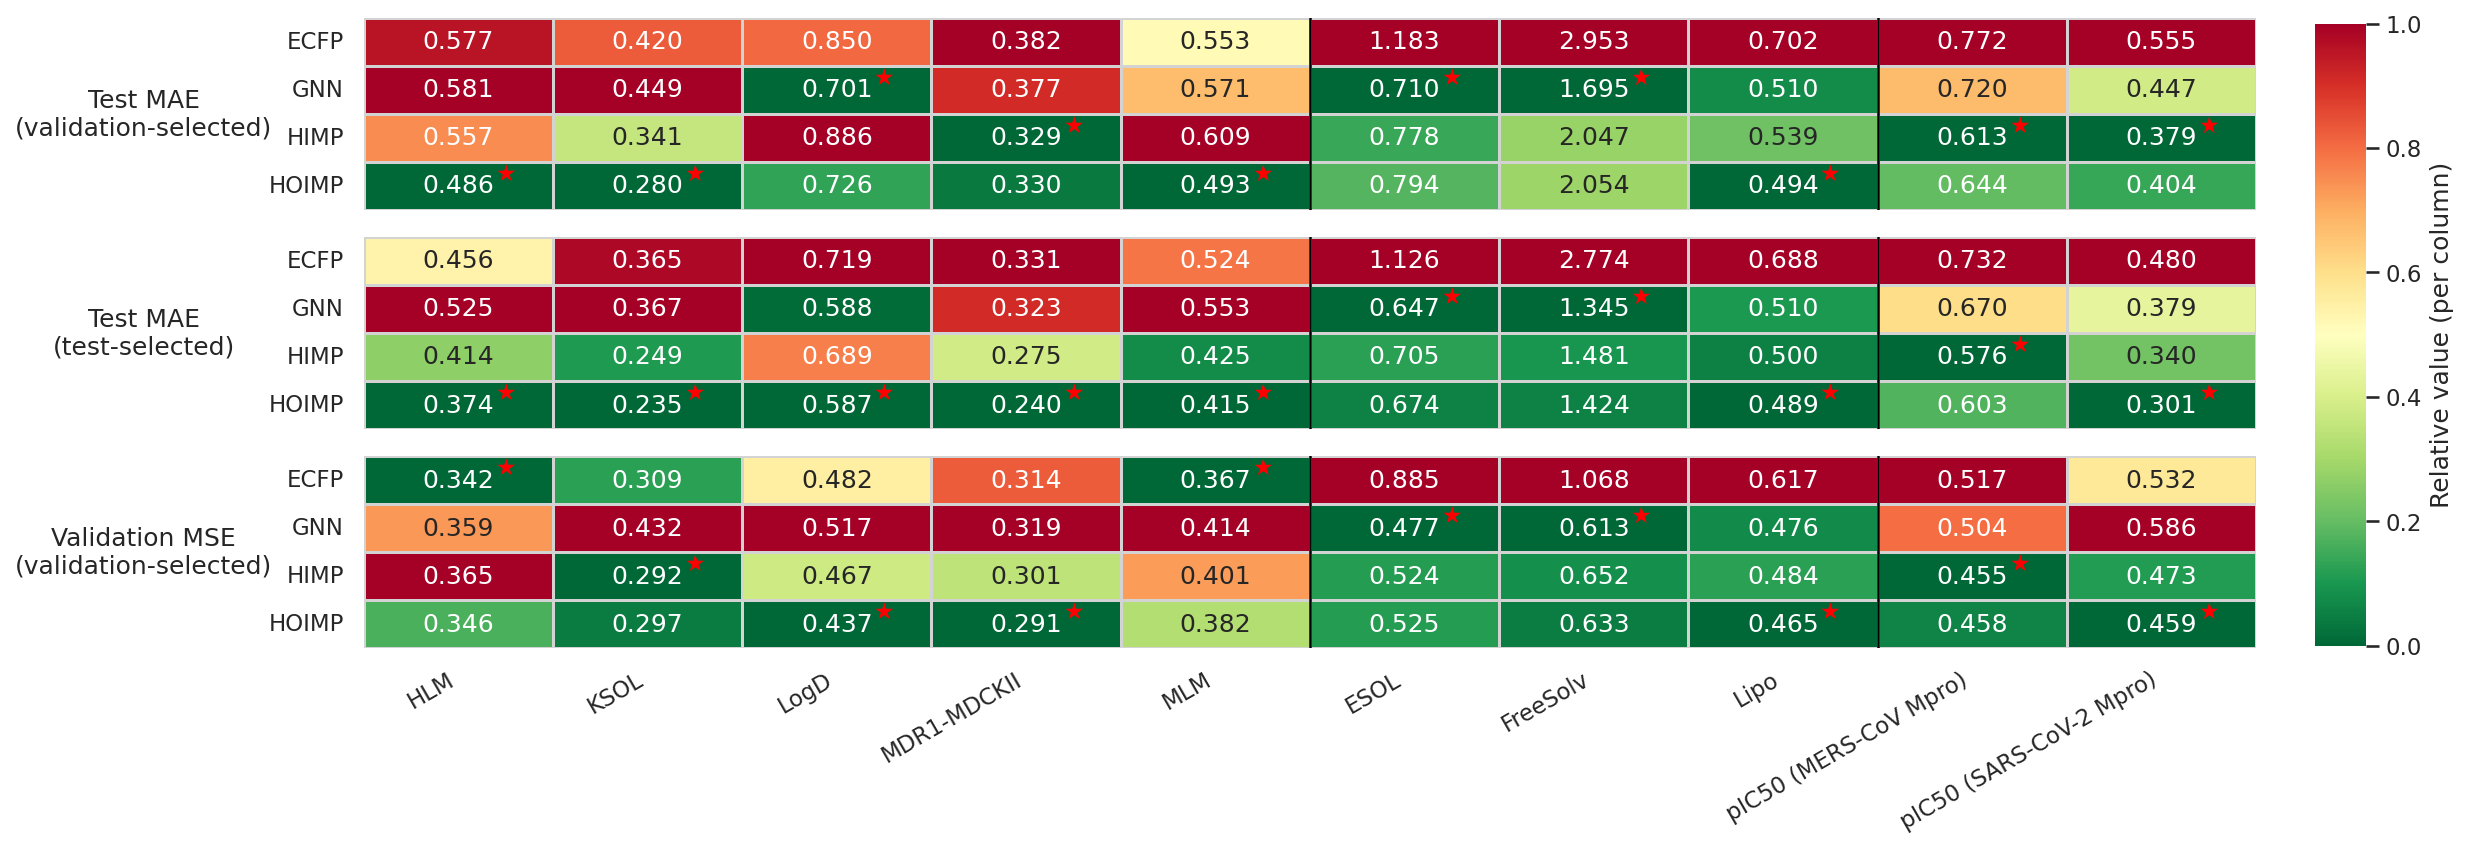

In [52]:
import seaborn as sns, matplotlib.pyplot as plt
import numpy as np, pandas as pd
from copy import deepcopy as dc

subset = dc(combined)
#subset = subset[subset['ft_resolution'] <= 1]
#subset = subset[subset['use_ft'] == True]
#subset = subset[subset['use_erg'] == True]


# --- Collapse architecture variants to base labels (post-renaming) ---
subset["repr_model"] = subset["repr_model"].str.replace(r"^HOIMP \([abc]\)$", "HOIMP", regex=True)
subset["repr_model"] = subset["repr_model"].str.replace(r"^HIMP \([abc]\)$", "HIMP", regex=True)

# Collapse base GNN architectures to a single label
subset["repr_model"] = subset["repr_model"].replace(
    {"GAT": "GNN", "GIN": "GNN", "GCN": "GNN", "GraphSAGE": "GNN"}
)

ARCH_COL = "repr_model"

# ---- build three tables --------------------------------------------------
# 1) Hyperparameters selected by lowest validation MSE
idx_val = subset.groupby(["task", "target_task", ARCH_COL])["mean_val_loss"].idxmin()
best_val = subset.loc[idx_val].copy()

# 2) Hyperparameters selected by lowest test MAE
idx_mae = subset.groupby(["task", "target_task", ARCH_COL])["mae_test_scaffold"].idxmin()
best_mae = subset.loc[idx_mae].copy()

# Build labelled frames:
val_selected_test_mae = best_val.copy()
val_selected_test_mae["criterion"] = "Test MAE\n(validation-selected)"

test_selected_test_mae = best_mae.copy()
test_selected_test_mae["criterion"] = "Test MAE\n(test-selected)"

val_selected_val_mse = best_val.copy()
val_selected_val_mse["criterion"] = "Validation MSE\n(validation-selected)"

plot_data = pd.concat(
    [val_selected_test_mae, test_selected_test_mae, val_selected_val_mse],
    ignore_index=True
)

# Assign the correct metric per criterion
plot_data["metric"] = np.select(
    [
        plot_data["criterion"] == "Test MAE\n(validation-selected)",
        plot_data["criterion"] == "Test MAE\n(test-selected)",
        plot_data["criterion"] == "Validation MSE\n(validation-selected)",
    ],
    [
        plot_data["mae_test_scaffold"],       # test MAE of val-selected config
        plot_data["mae_test_scaffold"],       # test MAE of test-selected config
        plot_data["mean_val_loss"],           # validation MSE of val-selected config
    ]
)

crit_order = [
    "Test MAE\n(validation-selected)",
    "Test MAE\n(test-selected)",
    "Validation MSE\n(validation-selected)"
]

target_order = (
    plot_data[["task","target_task"]]
    .drop_duplicates()
    .sort_values(["task","target_task"])
)["target_task"].tolist()
arch_order = sorted(plot_data[ARCH_COL].unique())

sns.set_theme(style="white")

fig, axes = plt.subplots(
    nrows=len(crit_order), ncols=1,
    figsize=(1.2 * len(target_order) + 5, 1.2 * len(arch_order) + 1),
    sharex=False, sharey=True
)
if len(crit_order) == 1:
    axes = [axes]

# Dedicated axis for colorbar
cbar_ax = fig.add_axes([0.9125, 0.2475, 0.02, 0.715])
mid_idx = len(crit_order) // 2

for i, (ax, crit) in enumerate(zip(axes, crit_order)):
    sub = plot_data[plot_data["criterion"] == crit]
    mat = (
        sub.pivot(index=ARCH_COL, columns="target_task", values="metric")
           .reindex(index=arch_order, columns=target_order)
    )

    # per-column normalization (0=best, 1=worst)
    col_min = mat.min(axis=0)
    col_max = mat.max(axis=0)
    denom = (col_max - col_min).replace(0, np.nan)
    norm_mat = (mat - col_min) / denom
    norm_mat = norm_mat.fillna(0.0)

    hm = sns.heatmap(
        norm_mat, ax=ax,
        cmap="RdYlGn_r",
        annot=mat.round(3), fmt=".3f",
        cbar=(i == mid_idx),
        cbar_ax=cbar_ax if i == mid_idx else None,
        vmin=0, vmax=1,
        linewidths=.5, linecolor="lightgrey",
        cbar_kws=dict(label="Relative value (per column)") if i == mid_idx else None
    )

    # Mark absolute minima per column (best actual values)
    for j, col in enumerate(mat.columns):
        vals = mat[col]
        if vals.isna().all():
            continue
        min_mask = (vals == vals.min())
        for i_idx in np.where(min_mask)[0]:
            ax.text(j + 0.75, i_idx + 0.25, "★",
                    ha="center", va="center",
                    color="red", fontsize=11, zorder=5)

    ax.set_ylabel(crit, rotation=0, labelpad=60, va="center")
    ax.set_xlabel("")

    # vertical separators between tasks
    task_series = (
        plot_data[["target_task","task"]]
        .drop_duplicates()
        .set_index("target_task")["task"]
        .reindex(mat.columns)
    )
    for idx in range(1, len(mat.columns)):
        if task_series.iloc[idx] != task_series.iloc[idx - 1]:
            ax.axvline(idx, color="black", linewidth=1.2)

    if crit != crit_order[-1]:
        ax.set_xticklabels([])
    else:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout(rect=[0, 0, 0.9, 1])
fig.savefig("results_main_heatmaps.pdf", bbox_inches="tight")
plt.show()


In [66]:
import numpy as np
import pandas as pd
from copy import deepcopy as dc

# ----------------- prep (same as before) -----------------
subset = dc(combined)
subset = dc(combined)
subset = subset[subset['ft_resolution'] == 1]
subset = subset[subset['use_ft'] == True]
subset = subset[subset['use_erg'] == True]

subset["repr_model"] = subset["repr_model"].str.replace(r"^HOIMP \([abc]\)$", "HOIMP", regex=True)
subset["repr_model"] = subset["repr_model"].str.replace(r"^HIMP \([abc]\)$", "HIMP", regex=True)
subset["repr_model"] = subset["repr_model"].replace(
    {"GAT": "GNN", "GIN": "GNN", "GCN": "GNN", "GraphSAGE": "GNN"}
)
ARCH_COL = "repr_model"

# Selections
idx_val = subset.groupby(["task", "target_task", ARCH_COL])["mean_val_loss"].idxmin()
best_val = subset.loc[idx_val].copy()

idx_mae = subset.groupby(["task", "target_task", ARCH_COL])["mae_test_scaffold"].idxmin()
best_mae = subset.loc[idx_mae].copy()

val_selected_test_mae = best_val.copy(); val_selected_test_mae["criterion"] = "MAE (val-sel)"
test_selected_test_mae = best_mae.copy(); test_selected_test_mae["criterion"] = "MAE (test-sel)"
val_selected_val_mse   = best_val.copy(); val_selected_val_mse["criterion"]   = "Val MSE (val-sel)"

plot_data = pd.concat(
    [val_selected_test_mae, test_selected_test_mae, val_selected_val_mse],
    ignore_index=True
)

# metric assignment
plot_data["metric"] = np.select(
    [
        plot_data["criterion"] == "MAE (val-sel)",
        plot_data["criterion"] == "MAE (test-sel)",
        plot_data["criterion"] == "Val MSE (val-sel)",
    ],
    [
        plot_data["mae_test_scaffold"],
        plot_data["mae_test_scaffold"],
        plot_data["mean_val_loss"],
    ]
)

# Dedup just in case
plot_data = plot_data.drop_duplicates(
    subset=[ARCH_COL, "task", "target_task", "criterion"], keep="first"
)

arch_order = sorted(plot_data[ARCH_COL].unique())
crit_order = ["MAE (val-sel)", "MAE (test-sel)", "Val MSE (val-sel)"]

# ----------------- helpers -----------------
def latex_escape(s: str) -> str:
    return (str(s)
        .replace("\\", r"\textbackslash{}")
        .replace("&", r"\&").replace("%", r"\%").replace("$", r"\$")
        .replace("#", r"\#").replace("_", r"\_")
        .replace("{", r"\{").replace("}", r"\}")
        .replace("~", r"\textasciitilde{}").replace("^", r"\textasciicircum{}"))

def shortstack(text: str) -> str:
    parts = [latex_escape(p) for p in str(text).split("\n")]
    return r"\shortstack[c]{%s}" % r"\\ ".join(parts)

def _cell_three_lines(v1, v2, v3, bold1=False, bold2=False, bold3=False, decimals=3):
    def fmt(v, b):
        if pd.isna(v): s = r"--"
        else: s = f"{v:.{decimals}f}"
        return rf"\textbf{{{s}}}" if b and s != r"--" else s
    return (r"\begin{tabular}{@{}c@{}}"
            + fmt(v1, bold1) + r" \\ "
            + fmt(v2, bold2) + r" \\ "
            + fmt(v3, bold3)
            + r"\end{tabular}")

# ----------------- build your specific layout + add MoleculeNet -----------------
def make_merged_table(decimals=3,
                      caption=("Potency, ADMET, and MoleculeNet results. "
                               "Cells show MAE (val-sel) / MAE (test-sel) / Val MSE (val-sel). Lower is better. "
                               "pIC50 (a) = MERS-CoV Mpro, pIC50 (b) = SARS-CoV-2 Mpro."),
                      label="tab:potency-admet-moleculenet"):
    # 1) Define EXACT order for admet + potency like your sample
    admet_targets_ordered = ["HLM", "KSOL", "LogD", "MDR1-MDCKII", "MLM"]
    # infer exact potency target names present in your data:
    # We'll map long names to display (a)/(b) if found
    potency_map = {
        "pIC50 (MERS-CoV Mpro)": "pIC50 (a)",
        "pIC50 (SARS-CoV-2 Mpro)": "pIC50 (b)",
        # fallbacks if your internal names differ
        "pIC50 MERS-CoV Mpro": "pIC50 (a)",
        "pIC50 SARS-CoV-2 Mpro": "pIC50 (b)",
    }
    # Find actual potency targets in the data and keep in order (a) then (b) if available
    pot_df = (plot_data[plot_data["task"]=="potency"][["target_task"]]
              .drop_duplicates())
    pot_targets_actual = pot_df["target_task"].tolist()
    # Build ordered potency list preferring the two known ones
    pot_order = [t for t in potency_map.keys() if t in pot_targets_actual]
    # If others exist, append them (display name = original)
    pot_order += [t for t in pot_targets_actual if t not in potency_map]

    # 2) Collect MoleculeNet targets in alphabetical order (you can customize)
    mn_df = (plot_data[plot_data["task"]=="molecule_net"][["target_task"]]
             .drop_duplicates()
             .sort_values("target_task"))
    mn_targets = mn_df["target_task"].tolist()

    # 3) Verify availability (keep only targets that exist in data)
    def has_target(task, target):
        return not plot_data[(plot_data["task"]==task) & (plot_data["target_task"]==target)].empty

    admet_targets = [t for t in admet_targets_ordered if has_target("admet", t)]
    pot_targets   = [t for t in pot_order if has_target("potency", t)]
    mn_targets    = [t for t in mn_targets if has_target("molecule_net", t)]

    # 4) Build column groups: (task_name, [targets], display_name_fn)
    def disp_name(task, t):
        if task == "potency":
            return potency_map.get(t, t)
        # keep others as-is; you can wrap with \n if you want to narrow further:
        # return t.replace(" (", "\n(")
        return t

    col_groups = [
        ("admet", admet_targets),
        ("potency", pot_targets),
        ("molecule_net", mn_targets),
    ]
    # Flatten target list for iteration
    flat_targets = [(task, t) for (task, ts) in col_groups for t in ts]

    # 5) Compute per-column minima for bolding
    col_min = {(task, t, c): np.inf for (task, t) in flat_targets for c in crit_order}
    values = {arch: {} for arch in arch_order}
    for arch in arch_order:
        sub_arch = plot_data[plot_data[ARCH_COL] == arch]
        for (task, t) in flat_targets:
            sub_t = sub_arch[(sub_arch["task"] == task) & (sub_arch["target_task"] == t)]
            for c in crit_order:
                v = sub_t.loc[sub_t["criterion"] == c, "metric"]
                v = v.iloc[0] if len(v) else np.nan
                values[arch][(task, t, c)] = v
                if not pd.isna(v):
                    col_min[(task, t, c)] = min(col_min[(task, t, c)], v)

    # 6) cmidrule spans per group
    spans = []
    start_col = 2  # col 1 = Architecture
    for task, targets in col_groups:
        n = len(targets)
        if n == 0: continue
        spans.append((task, start_col, start_col + n - 1))
        start_col += n

    # 7) LaTeX emit — matches your style
    align = "l " + " ".join(["c"] * sum(len(ts) for _, ts in col_groups))

    lines = []
    lines.append(r"\begin{table}")
    lines.append(r"\centering")
    lines.append(r"\footnotesize")
    lines.append(r"\begingroup\setlength{\tabcolsep}{4pt}\renewcommand{\arraystretch}{1.04}")
    lines.append(rf"\begin{{NiceTabular}}{{{align}}}[colortbl-like]")
    lines.append(r"\toprule")

    # Header row 1: group titles
    h1 = [r"\multicolumn{1}{c}{\textbf{Arch.}}"]
    for task, s, e in spans:
        h1.append(fr"\multicolumn{{{e - s + 1}}}{{c}}{{\textbf{{{latex_escape(task)}}}}}")
    lines.append(" & ".join(h1) + r" \\")
    for _, s, e in spans:
        lines.append(fr"\cmidrule(lr){{{s}-{e}}}")

    # Header row 2: short/stacked target names
    h2 = [""]
    for (task, targets) in col_groups:
        for t in targets:
            h2.append(shortstack(disp_name(task, t)))
    lines.append(" & ".join(h2) + r" \\")
    lines.append(r"\midrule")

    # Body rows
    for i, arch in enumerate(arch_order):
        maybe_shade = r"\rowcolor{gray!10} " if (i % 2 == 1) else ""
        row_cells = [latex_escape(arch)]
        for (task, targets) in col_groups:
            for t in targets:
                v1 = values[arch].get((task, t, "MAE (val-sel)"), np.nan)
                v2 = values[arch].get((task, t, "MAE (test-sel)"), np.nan)
                v3 = values[arch].get((task, t, "Val MSE (val-sel)"), np.nan)
                b1 = np.isfinite(col_min[(task, t, "MAE (val-sel)")])   and np.isclose(v1, col_min[(task, t, "MAE (val-sel)")],   atol=10**(-decimals-2))
                b2 = np.isfinite(col_min[(task, t, "MAE (test-sel)")])  and np.isclose(v2, col_min[(task, t, "MAE (test-sel)")],  atol=10**(-decimals-2))
                b3 = np.isfinite(col_min[(task, t, "Val MSE (val-sel)")]) and np.isclose(v3, col_min[(task, t, "Val MSE (val-sel)")], atol=10**(-decimals-2))
                row_cells.append(_cell_three_lines(v1, v2, v3, b1, b2, b3, decimals=decimals))
        lines.append(maybe_shade + " & ".join(row_cells) + r" \\")

    lines.append(r"\bottomrule")
    lines.append(r"\end{NiceTabular}")
    lines.append(r"\endgroup")
    lines.append(fr"\caption{{{latex_escape(caption)}}}")
    lines.append(fr"\label{{{latex_escape(label)}}}")
    lines.append(r"\end{table}")

    return "\n".join(lines)

# --------- Emit the merged table (admet + potency + moleculenet) ----------
tex_merged = make_merged_table(
    decimals=3,
    caption=("Potency, ADMET, and MoleculeNet results. "
             "Cells show MAE (val-sel) / MAE (test-sel) / Val MSE (val-sel). Lower is better. "
             "pIC50 (a) = MERS-CoV Mpro, pIC50 (b) = SARS-CoV-2 Mpro."),
    label="tab:potency-admet-moleculenet"
)
print(tex_merged)


\begin{table}
\centering
\footnotesize
\begingroup\setlength{\tabcolsep}{4pt}\renewcommand{\arraystretch}{1.04}
\begin{NiceTabular}{l c c c c c c c c c c}[colortbl-like]
\toprule
\multicolumn{1}{c}{\textbf{Arch.}} & \multicolumn{5}{c}{\textbf{admet}} & \multicolumn{2}{c}{\textbf{potency}} & \multicolumn{3}{c}{\textbf{molecule\_net}} \\
\cmidrule(lr){2-6}
\cmidrule(lr){7-8}
\cmidrule(lr){9-11}
 & \shortstack[c]{HLM} & \shortstack[c]{KSOL} & \shortstack[c]{LogD} & \shortstack[c]{MDR1-MDCKII} & \shortstack[c]{MLM} & \shortstack[c]{pIC50 (a)} & \shortstack[c]{pIC50 (b)} & \shortstack[c]{ESOL} & \shortstack[c]{FreeSolv} & \shortstack[c]{Lipo} \\
\midrule
HOIMP & \begin{tabular}{@{}c@{}}\textbf{0.483} \\ \textbf{0.374} \\ \textbf{0.350}\end{tabular} & \begin{tabular}{@{}c@{}}\textbf{0.361} \\ \textbf{0.245} \\ \textbf{0.307}\end{tabular} & \begin{tabular}{@{}c@{}}\textbf{0.726} \\ \textbf{0.613} \\ \textbf{0.437}\end{tabular} & \begin{tabular}{@{}c@{}}\textbf{0.376} \\ \textbf{0.264} \\ \tex